<a href="https://colab.research.google.com/github/GV-A/Customer-churn/blob/main/ZIDIO_DEVELOPMENT_IPL_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***EDA***

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#LOADING THE DATASETS
matches_df = pd.read_csv('/content/matches.csv')
deliveries_df = pd.read_csv('/content/deliveries.csv', on_bad_lines='skip')

In [5]:
deliveries_df.head()

match_id  inning           batting_team                 bowling_team  over  \
0    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   
1    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   
2    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   
3    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   
4    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   

   ball       batter   bowler  non_striker  batsman_runs  extra_runs  \
0     1   SC Ganguly  P Kumar  BB McCullum           0.0         1.0   
1     2  BB McCullum  P Kumar   SC Ganguly           0.0         0.0   
2     3  BB McCullum  P Kumar   SC Ganguly           0.0         1.0   
3     4  BB McCullum  P Kumar   SC Ganguly           0.0         0.0   
4     5  BB McCullum  P Kumar   SC Ganguly           0.0         0.0   

   total_runs extras_type  is_wicket player_dismissed dismissal_kind fielder  
0         1.0     legbyes        0.0              NaN            NaN     NaN  
1         0.0         NaN        0.0              NaN            NaN     NaN  
2         1.0       wides        0.0              NaN            NaN     NaN  
3         0.0         NaN        0.0              NaN            NaN     NaN  
4         0.0         NaN        0.0              NaN            NaN     NaN

In [6]:
matches_df.head()

id   season        city        date match_type player_of_match  \
0  335982  2007/08   Bangalore  2008-04-18     League     BB McCullum   
1  335983  2007/08  Chandigarh  2008-04-19     League      MEK Hussey   
2  335984  2007/08       Delhi  2008-04-19     League     MF Maharoof   
3  335985  2007/08      Mumbai  2008-04-20     League      MV Boucher   
4  335986  2007/08     Kolkata  2008-04-20     League       DJ Hussey   

                                        venue                        team1  \
0                       M Chinnaswamy Stadium  Royal Challengers Bangalore   
1  Punjab Cricket Association Stadium, Mohali              Kings XI Punjab   
2                            Feroz Shah Kotla             Delhi Daredevils   
3                            Wankhede Stadium               Mumbai Indians   
4                                Eden Gardens        Kolkata Knight Riders   

                         team2                  toss_winner toss_decision  \
0        Kolkata Knight Riders  Royal Challengers Bangalore         field   
1          Chennai Super Kings          Chennai Super Kings           bat   
2             Rajasthan Royals             Rajasthan Royals           bat   
3  Royal Challengers Bangalore               Mumbai Indians           bat   
4              Deccan Chargers              Deccan Chargers           bat   

                        winner   result  result_margin  target_runs  \
0        Kolkata Knight Riders     runs          140.0        223.0   
1          Chennai Super Kings     runs           33.0        241.0   
2             Delhi Daredevils  wickets            9.0        130.0   
3  Royal Challengers Bangalore  wickets            5.0        166.0   
4        Kolkata Knight Riders  wickets            5.0        111.0   

   target_overs super_over method    umpire1         umpire2  
0          20.0          N    NaN  Asad Rauf     RE Koertzen  
1          20.0          N    NaN  MR Benson      SL Shastri  
2          20.0          N    NaN  Aleem Dar  GA Pratapkumar  
3          20.0          N    NaN   SJ Davis       DJ Harper  
4          20.0          N    NaN  BF Bowden     K Hariharan

In [7]:
matches_df.shape

(1095, 20)

In [8]:
deliveries_df.shape

(213187, 17)

In [9]:
matches_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

In [10]:
deliveries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213187 entries, 0 to 213186
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   match_id          213187 non-null  int64  
 1   inning            213187 non-null  int64  
 2   batting_team      213187 non-null  object 
 3   bowling_team      213187 non-null  object 
 4   over              213187 non-null  int64  
 5   ball              213187 non-null  int64  
 6   batter            213187 non-null  object 
 7   bowler            213187 non-null  object 
 8   non_striker       213186 non-null  object 
 9   batsman_runs      213186 non-null  float64
 10  extra_runs        213186 non-null  float64
 11  total_runs        213186 non-null  float64
 12  extras_type       11292 non-null   object 
 13  is_wicket         213186 non-null  float64
 14  player_dismissed  10494 non-null   object 
 15  dismissal_kind    10494 non-null   object 
 16  fielder           74

In [11]:
matches_df.describe()

id  result_margin  target_runs  target_overs
count  1.095000e+03    1076.000000  1092.000000   1092.000000
mean   9.048283e+05      17.259294   165.684066     19.759341
std    3.677402e+05      21.787444    33.427048      1.581108
min    3.359820e+05       1.000000    43.000000      5.000000
25%    5.483315e+05       6.000000   146.000000     20.000000
50%    9.809610e+05       8.000000   166.000000     20.000000
75%    1.254062e+06      20.000000   187.000000     20.000000
max    1.426312e+06     146.000000   288.000000     20.000000

In [12]:
deliveries_df.describe()

match_id         inning           over           ball  \
count  2.131870e+05  213187.000000  213187.000000  213187.000000   
mean   8.037408e+05       1.483726       9.178022       3.617524   
std    3.269128e+05       0.503300       5.680762       1.808823   
min    3.359820e+05       1.000000       0.000000       1.000000   
25%    5.012480e+05       1.000000       4.000000       2.000000   
50%    7.340310e+05       1.000000       9.000000       4.000000   
75%    1.136600e+06       2.000000      14.000000       5.000000   
max    1.304068e+06       6.000000      19.000000      10.000000   

        batsman_runs     extra_runs     total_runs      is_wicket  
count  213186.000000  213186.000000  213186.000000  213186.000000  
mean        1.241132       0.066393       1.307525       0.049225  
std         1.613154       0.339462       1.601142       0.216337  
min         0.000000       0.000000       0.000000       0.000000  
25%         0.000000       0.000000       0.000000       0.000000  
50%         1.000000       0.000000       1.000000       0.000000  
75%         1.000000       0.000000       1.000000       0.000000  
max         6.000000       7.000000       7.000000       1.000000

In [13]:
matches_df.isnull().sum()

id                    0
season                0
city                 51
date                  0
match_type            0
player_of_match       5
venue                 0
team1                 0
team2                 0
toss_winner           0
toss_decision         0
winner                5
result                0
result_margin        19
target_runs           3
target_overs          3
super_over            0
method             1074
umpire1               0
umpire2               0
dtype: int64

In [14]:
matches_df['city'].value_counts()

city
Mumbai            173
Kolkata            93
Delhi              90
Chennai            85
Hyderabad          77
Bangalore          65
Chandigarh         61
Jaipur             57
Pune               51
Abu Dhabi          37
Ahmedabad          36
Bengaluru          29
Visakhapatnam      15
Durban             15
Lucknow            14
Dubai              13
Dharamsala         13
Centurion          12
Rajkot             10
Sharjah            10
Navi Mumbai         9
Indore              9
Johannesburg        8
Ranchi              7
Cuttack             7
Cape Town           7
Port Elizabeth      7
Raipur              6
Kochi               5
Mohali              5
Kanpur              4
East London         3
Kimberley           3
Nagpur              3
Guwahati            3
Bloemfontein        2
Name: count, dtype: int64

In [15]:
matches_df['city'].fillna('Mumbai', inplace=True)

<ipython-input-15-e4c71ac51c1f>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  matches_df['city'].fillna('Mumbai', inplace=True)


In [16]:
matches_df['winner'].fillna('Draw/No Result', inplace=True)
matches_df['player_of_match'].fillna('No Player of the Match', inplace=True)

median_margin = matches_df['result_margin'].median()
matches_df['result_margin'].fillna(median_margin, inplace=True)

median_target_runs = matches_df['target_runs'].median()
matches_df['target_runs'].fillna(median_margin, inplace=True)

median_target_overs = matches_df['target_overs'].median()
matches_df['target_overs'].fillna(median_target_overs, inplace=True)

matches_df['method'].fillna('No method applied', inplace=True)

<ipython-input-16-23c1983267b5>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  matches_df['winner'].fillna('Draw/No Result', inplace=True)
<ipython-input-16-23c1983267b5>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)

In [17]:
deliveries_df.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batter                   0
bowler                   0
non_striker              1
batsman_runs             1
extra_runs               1
total_runs               1
extras_type         201895
is_wicket                1
player_dismissed    202693
dismissal_kind      202693
fielder             205712
dtype: int64

In [18]:
deliveries_df['extras_type'].fillna('No extras', inplace=True)
deliveries_df['player_dismissed'].fillna('Unknown', inplace=True)
deliveries_df['dismissal_kind'].fillna('No dismissal', inplace=True)
deliveries_df['fielder'].fillna('No fielder', inplace=True)

<ipython-input-18-e8a59c108b34>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  deliveries_df['extras_type'].fillna('No extras', inplace=True)
<ipython-input-18-e8a59c108b34>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

**REMOVING REPEATED VALUES**

In [19]:
deliveries_df['batting_team'].unique()

array(['Kolkata Knight Riders', 'Royal Challengers Bangalore',
       'Chennai Super Kings', 'Kings XI Punjab', 'Rajasthan Royals',
       'Delhi Daredevils', 'Mumbai Indians', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Lucknow Super Giants', 'Gujarat Titans'], dtype=object)

In [20]:
deliveries_df['bowling_team'].unique()

array(['Royal Challengers Bangalore', 'Kolkata Knight Riders',
       'Kings XI Punjab', 'Chennai Super Kings', 'Delhi Daredevils',
       'Rajasthan Royals', 'Mumbai Indians', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Gujarat Titans', 'Lucknow Super Giants'], dtype=object)

In [ ]:
# Define replacements using a dictionary
team_replacements = {
    'Rising Pune Supergiant': 'Rising Pune Supergiants',
    'Delhi Daredevils': 'Delhi Capitals'
}

# Apply replacements to 'batting_team' and 'bowling_team' columns
deliveries_df['batting_team'].replace(team_replacements, inplace=True)
deliveries_df['bowling_team'].replace(team_replacements, inplace=True)

<ipython-input-23-925734379582>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  deliveries_df['batting_team'].replace(team_replacements, inplace=True)
<ipython-input-23-925734379582>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, in

**NO OF WINS BY EVERY TEAM**

In [ ]:
matches_df['winner'].value_counts()

winner
Mumbai Indians                 144
Chennai Super Kings            138
Kolkata Knight Riders          131
Royal Challengers Bangalore    116
Rajasthan Royals               112
Kings XI Punjab                 88
Sunrisers Hyderabad             88
Delhi Daredevils                67
Delhi Capitals                  48
Deccan Chargers                 29
Gujarat Titans                  28
Punjab Kings                    24
Lucknow Super Giants            24
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Royal Challengers Bengaluru      7
Kochi Tuskers Kerala             6
Draw/No Result                   5
Rising Pune Supergiants          5
Name: count, dtype: int64

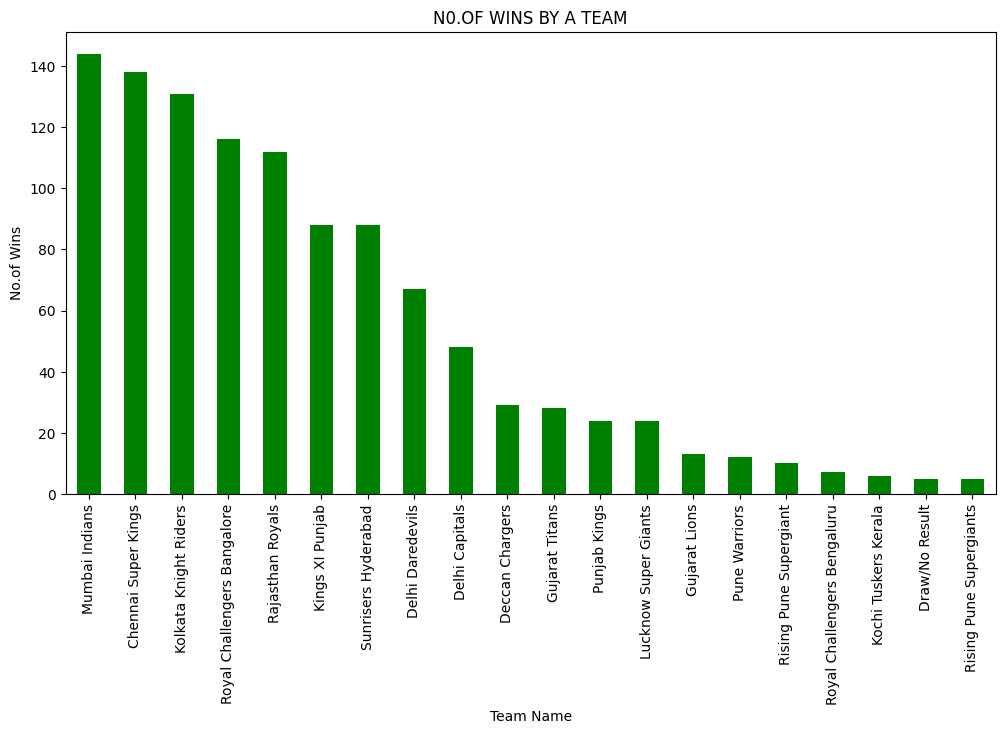

In [ ]:
matches_df['winner'].value_counts().plot.bar(figsize=(12, 6),color='green')
plt.title("N0.OF WINS BY A TEAM",size=12)
plt.xlabel("Team Name",size=10)
plt.ylabel("No.of Wins",size=10)
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()

# ***TEAM ANALYSIS***

**TEAMS WINNING MOST MATCHES**

Teams with the Most Wins:
winner
Mumbai Indians                 144
Chennai Super Kings            138
Kolkata Knight Riders          131
Royal Challengers Bangalore    116
Rajasthan Royals               112
Sunrisers Hyderabad             88
Kings XI Punjab                 88
Delhi Daredevils                67
Delhi Capitals                  48
Deccan Chargers                 29
Gujarat Titans                  28
Punjab Kings                    24
Lucknow Super Giants            24
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Royal Challengers Bengaluru      7
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: count, dtype: int64


<ipython-input-6-4b5ac729b290>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=team_wins.index, y=team_wins.values, palette='viridis')


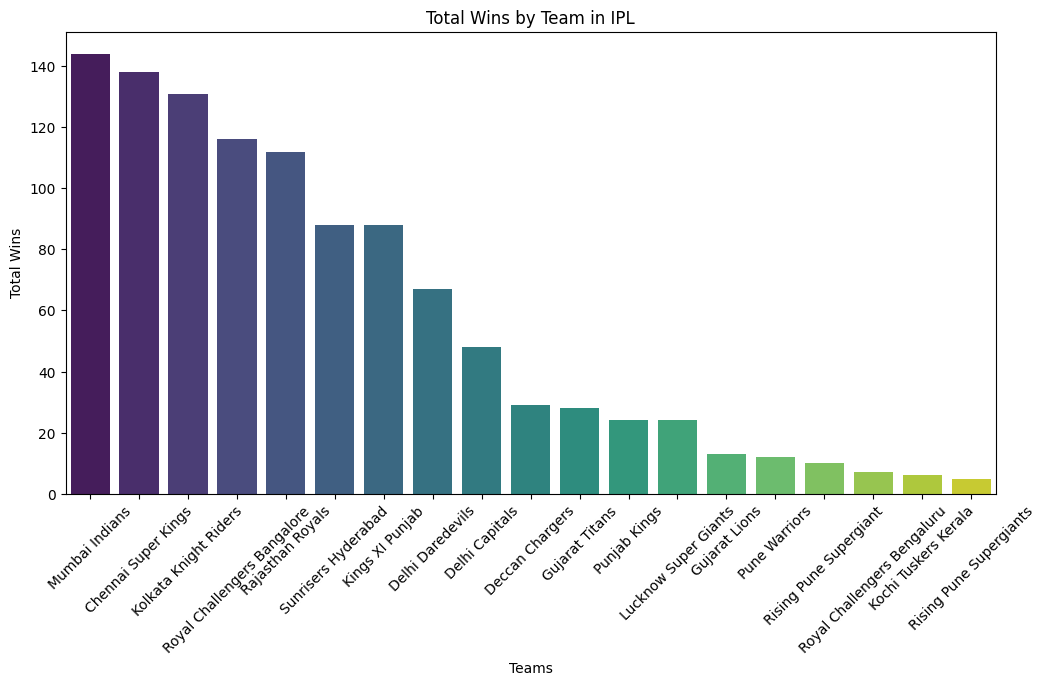

The team with the most wins is Mumbai Indians with 144 wins.


In [ ]:
# Count the number of wins for each team
team_wins = matches_df['winner'].value_counts()

# Display the results
print("Teams with the Most Wins:")
print(team_wins)

# Plot the results
plt.figure(figsize=(12,6))
sns.barplot(x=team_wins.index, y=team_wins.values, palette='viridis')
plt.xticks(rotation=45)
plt.xlabel("Teams")
plt.ylabel("Total Wins")
plt.title("Total Wins by Team in IPL")
plt.show()

# Analysis
most_wins_team = team_wins.idxmax()
most_wins_count = team_wins.max()
print(f"The team with the most wins is {most_wins_team} with {most_wins_count} wins.")

**WINNIG PERCENTAGE OF TEAMS**

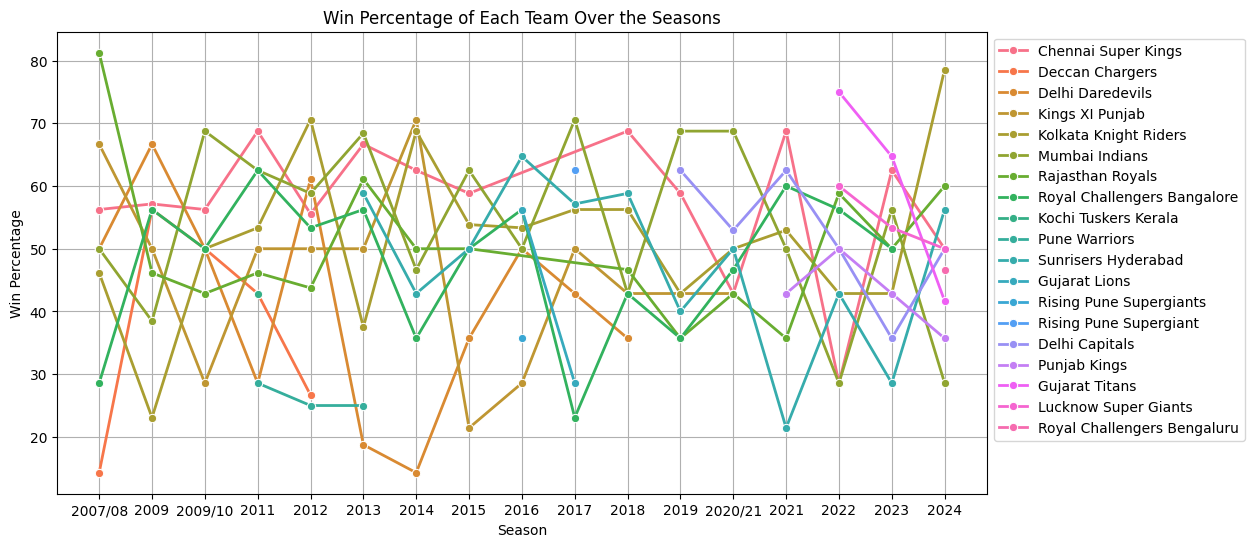

In [ ]:

# Rename columns for clarity
matches_df = matches_df.rename(columns={"season": "Season", "winner": "Winner", "team1": "Team1", "team2": "Team2"})

# Count total matches played per team per season
team1_matches = matches_df.groupby(["Season", "Team1"]).size().reset_index(name="Matches_Played")
team2_matches = matches_df.groupby(["Season", "Team2"]).size().reset_index(name="Matches_Played")

# Rename columns to have a common "Team" column
team1_matches = team1_matches.rename(columns={"Team1": "Team"})
team2_matches = team2_matches.rename(columns={"Team2": "Team"})

# Merge both to get total matches per team per season
total_matches = pd.concat([team1_matches, team2_matches])
total_matches = total_matches.groupby(["Season", "Team"]).sum().reset_index()

# Count total wins per team per season
wins = matches_df.groupby(["Season", "Winner"]).size().reset_index(name="Wins")
wins = wins.rename(columns={"Winner": "Team"})  # Rename for merging

# Merge total matches and wins
win_percentage = pd.merge(wins, total_matches, on=["Season", "Team"], how="right").fillna(0)
win_percentage["Win %"] = (win_percentage["Wins"] / win_percentage["Matches_Played"]) * 100

# Plot win percentage over seasons
plt.figure(figsize=(12, 6))
sns.lineplot(data=win_percentage, x="Season", y="Win %", hue="Team", marker="o", linewidth=2)
plt.title("Win Percentage of Each Team Over the Seasons")
plt.xlabel("Season")
plt.ylabel("Win Percentage")
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()


**MATCHES WON BY THE TEAMS**

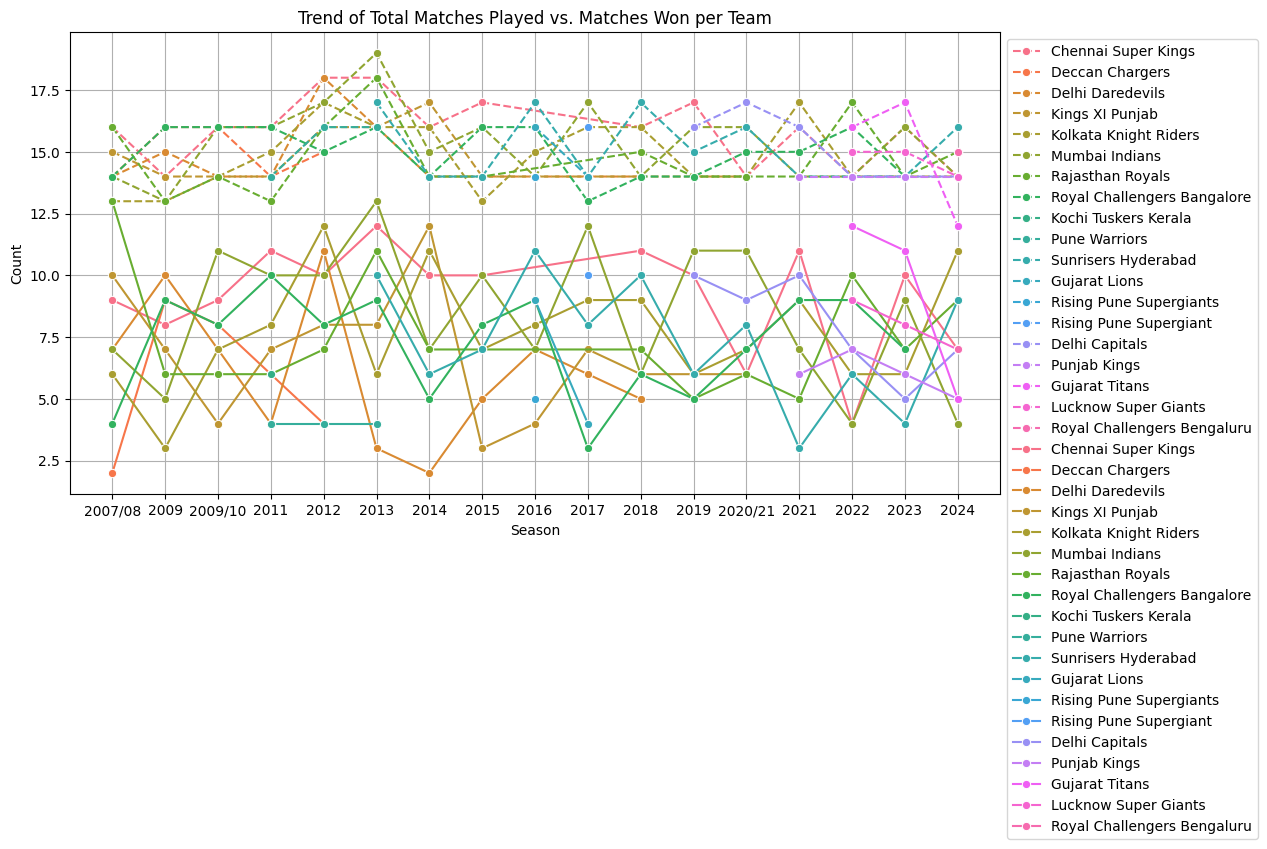

In [ ]:
# Merge total matches and wins
team_performance = pd.merge(total_matches, wins, on=["Season", "Team"], how="left").fillna(0)

# Plot total matches played vs. matches won over the seasons
plt.figure(figsize=(12, 6))

sns.lineplot(data=team_performance, x="Season", y="Matches_Played", hue="Team", marker="o", linestyle="dashed")
sns.lineplot(data=team_performance, x="Season", y="Wins", hue="Team", marker="o", linestyle="solid")

plt.title("Trend of Total Matches Played vs. Matches Won per Team")
plt.xlabel("Season")
plt.ylabel("Count")
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

**Team Performance when Batting First vs. Chasing**

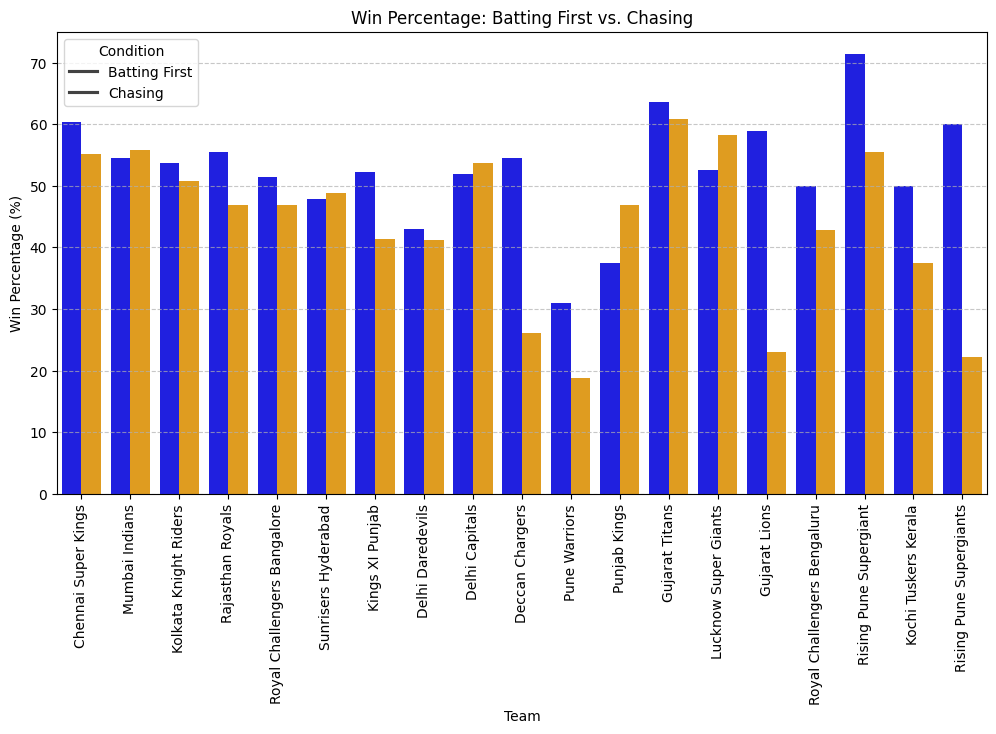

In [ ]:
# Rename columns for clarity
matches_df = matches_df.rename(columns={"season": "Season", "winner": "Winner", "team1": "Team1", "team2": "Team2", "toss_winner": "Toss_Winner", "toss_decision": "Toss_Decision"})

# Determine if a team was batting first or chasing
matches_df["Batting_First_Team"] = matches_df.apply(lambda row: row["Team1"] if row["Toss_Decision"] == "bat" else row["Team2"], axis=1)
matches_df["Chasing_Team"] = matches_df.apply(lambda row: row["Team2"] if row["Toss_Decision"] == "bat" else row["Team1"], axis=1)

# Count total matches played while batting first and chasing
batting_first_matches = matches_df["Batting_First_Team"].value_counts().reset_index()
batting_first_matches.columns = ["Team", "Batting_First_Matches"]

chasing_matches = matches_df["Chasing_Team"].value_counts().reset_index()
chasing_matches.columns = ["Team", "Chasing_Matches"]

# Count total wins when batting first and chasing
batting_first_wins = matches_df[matches_df["Winner"] == matches_df["Batting_First_Team"]]["Winner"].value_counts().reset_index()
batting_first_wins.columns = ["Team", "Batting_First_Wins"]

chasing_wins = matches_df[matches_df["Winner"] == matches_df["Chasing_Team"]]["Winner"].value_counts().reset_index()
chasing_wins.columns = ["Team", "Chasing_Wins"]

# Merge data into a single dataframe
team_performance = pd.merge(batting_first_matches, batting_first_wins, on="Team", how="left").fillna(0)
team_performance = pd.merge(team_performance, chasing_matches, on="Team", how="left").fillna(0)
team_performance = pd.merge(team_performance, chasing_wins, on="Team", how="left").fillna(0)

# Calculate win percentages
team_performance["Batting_First_Win_Percentage"] = (team_performance["Batting_First_Wins"] / team_performance["Batting_First_Matches"]) * 100
team_performance["Chasing_Win_Percentage"] = (team_performance["Chasing_Wins"] / team_performance["Chasing_Matches"]) * 100

# Plot performance when batting first vs. chasing
plt.figure(figsize=(12, 6))
team_performance_melted = team_performance.melt(id_vars=["Team"], value_vars=["Batting_First_Win_Percentage", "Chasing_Win_Percentage"],
                                                var_name="Condition", value_name="Win Percentage")

sns.barplot(data=team_performance_melted, x="Team", y="Win Percentage", hue="Condition", palette=["blue", "orange"])
plt.xticks(rotation=90)
plt.title("Win Percentage: Batting First vs. Chasing")
plt.ylabel("Win Percentage (%)")
plt.xlabel("Team")
plt.legend(title="Condition", labels=["Batting First", "Chasing"])
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


**TEAMS WITH MOST IPL TITLES**

<ipython-input-19-fbbac50f8a61>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=title_wins, x="Titles_Won", y="Team", palette="viridis")


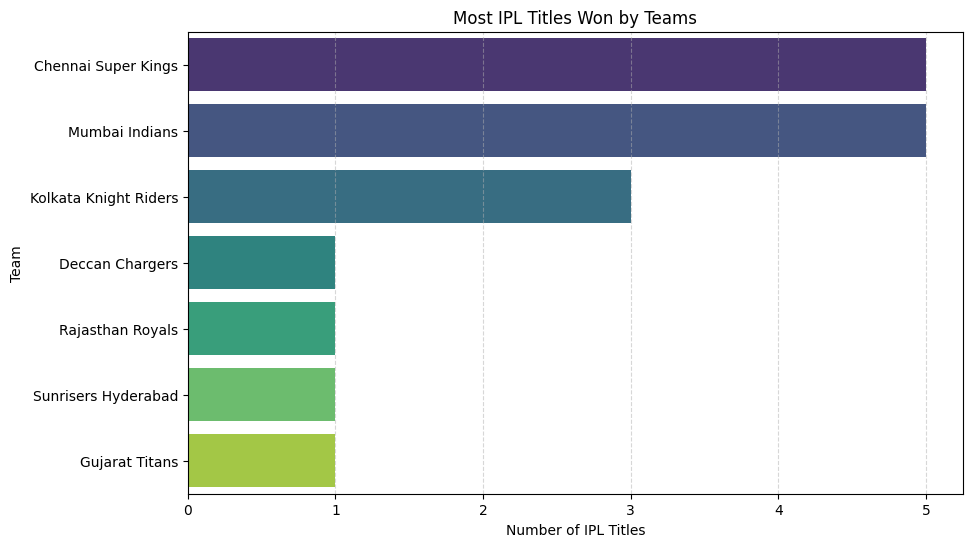

In [ ]:
# Rename columns for clarity
matches_df = matches_df.rename(columns={"season": "Season", "winner": "Winner"})

# Identify final matches of each season
final_matches = matches_df.drop_duplicates(subset=["Season"], keep="last")

# Count the number of times each team has won the final match
title_wins = final_matches["Winner"].value_counts().reset_index()
title_wins.columns = ["Team", "Titles_Won"]

# Sort by number of titles
title_wins = title_wins.sort_values(by="Titles_Won", ascending=False)

# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(data=title_wins, x="Titles_Won", y="Team", palette="viridis")
plt.xlabel("Number of IPL Titles")
plt.ylabel("Team")
plt.title("Most IPL Titles Won by Teams")
plt.grid(axis="x", linestyle="--", alpha=0.5)
plt.show()

**TOSS IMPACT ON MATCH WINS**

Total Matches: 1095
Matches where Toss Winner also won: 554
Toss Win to Match Win Percentage: 50.59%


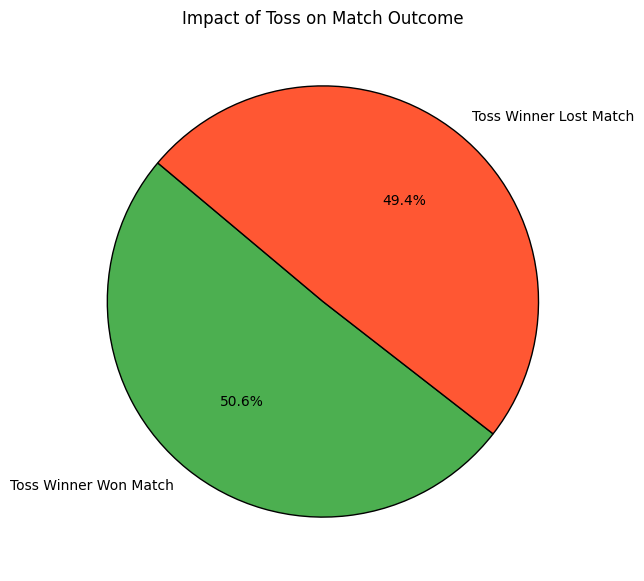

In [ ]:
toss_column = "toss_winner"  # Column for toss-winning team
match_winner_column = "winner"  # Column for match-winning team

# Count matches where the toss winner also won the match
toss_wins = matches_df[matches_df[toss_column] == matches_df[match_winner_column]].shape[0]

# Total matches played
total_matches = matches_df.shape[0]

# Calculate percentage of matches where toss winner won
toss_win_percentage = (toss_wins / total_matches) * 100

# Print results
print(f"Total Matches: {total_matches}")
print(f"Matches where Toss Winner also won: {toss_wins}")
print(f"Toss Win to Match Win Percentage: {toss_win_percentage:.2f}%")

# Plot the results
labels = ["Toss Winner Won Match", "Toss Winner Lost Match"]
sizes = [toss_wins, total_matches - toss_wins]
colors = ["#4CAF50", "#FF5733"]

plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, autopct="%1.1f%%", colors=colors, startangle=140, wedgeprops={"edgecolor": "black"})
plt.title("Impact of Toss on Match Outcome")
plt.show()


**HIGHEST RUNS SCORED BY TEAMS**

                   batting_team  total_runs
12  Royal Challengers Bangalore       263.0
6         Kolkata Knight Riders       245.0
0           Chennai Super Kings       240.0
14          Sunrisers Hyderabad       231.0
5               Kings XI Punjab       231.0
7                Mumbai Indians       223.0
3              Delhi Daredevils       219.0
9              Rajasthan Royals       217.0
1               Deccan Chargers       214.0
2                Delhi Capitals       213.0
4                 Gujarat Lions       208.0
11      Rising Pune Supergiants       195.0
8                 Pune Warriors       192.0
10       Rising Pune Supergiant       187.0
13     Royal Challengers Bangns         1.0


<ipython-input-29-0849feb68bf3>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="total_runs", y="batting_team", data=highest_scores, palette="coolwarm")


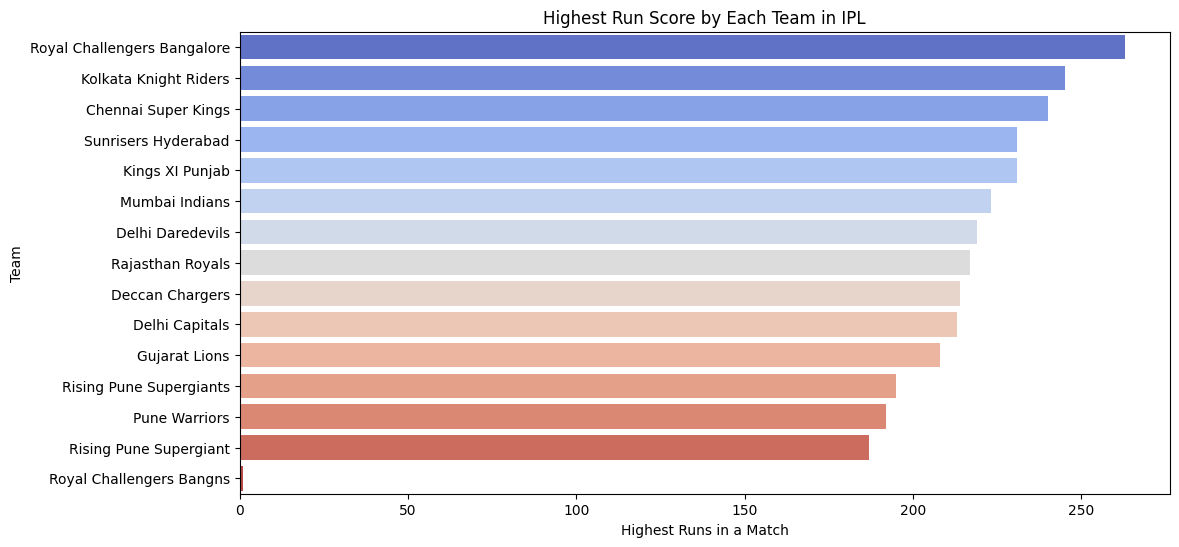

In [ ]:
# Aggregate total runs per match for each team
team_scores = deliveries_df.groupby(["match_id", "batting_team"])["total_runs"].sum().reset_index()

# Get highest score by each team
highest_scores = team_scores.groupby("batting_team")["total_runs"].max().reset_index()

# Sort by highest runs
highest_scores = highest_scores.sort_values(by="total_runs", ascending=False)

# Display result
print(highest_scores)

# Plot highest runs scored by each team
plt.figure(figsize=(12, 6))
sns.barplot(x="total_runs", y="batting_team", data=highest_scores, palette="coolwarm")
plt.xlabel("Highest Runs in a Match")
plt.ylabel("Team")
plt.title("Highest Run Score by Each Team in IPL")
plt.show()


**LOWEST RUNS SCORED BY TEAMS**

                   batting_team  total_runs
13     Royal Challengers Bangns         1.0
12  Royal Challengers Bangalore         2.0
14          Sunrisers Hyderabad        44.0
6         Kolkata Knight Riders        48.0
0           Chennai Super Kings        55.0
9              Rajasthan Royals        58.0
3              Delhi Daredevils        58.0
5               Kings XI Punjab        68.0
7                Mumbai Indians        68.0
2                Delhi Capitals        69.0
1               Deccan Chargers        73.0
11      Rising Pune Supergiants        76.0
10       Rising Pune Supergiant        78.0
8                 Pune Warriors        99.0
4                 Gujarat Lions       104.0


<ipython-input-30-2b0aad4d8c23>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="total_runs", y="batting_team", data=lowest_scores, palette="coolwarm")


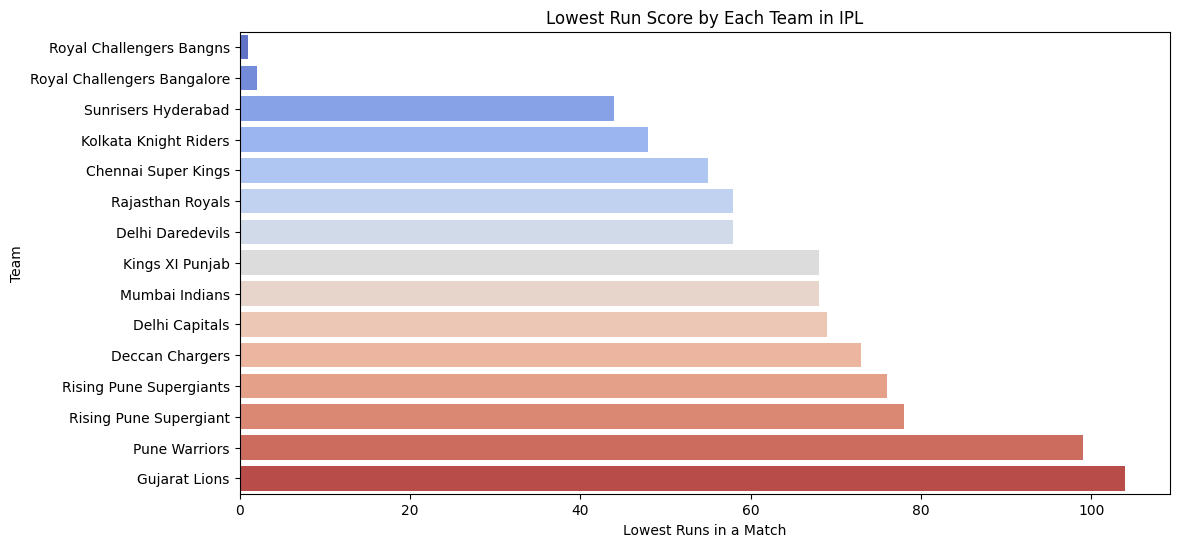

In [ ]:
# Aggregate total runs per match for each team
team_scores = deliveries_df.groupby(["match_id", "batting_team"])["total_runs"].sum().reset_index()

# Get lowest score by each team
lowest_scores = team_scores.groupby("batting_team")["total_runs"].min().reset_index()

# Sort by lowest runs
lowest_scores = lowest_scores.sort_values(by="total_runs", ascending=True)

# Display result
print(lowest_scores)

# Plot lowest runs scored by each team
plt.figure(figsize=(12, 6))
sns.barplot(x="total_runs", y="batting_team", data=lowest_scores, palette="coolwarm")
plt.xlabel("Lowest Runs in a Match")
plt.ylabel("Team")
plt.title("Lowest Run Score by Each Team in IPL")
plt.show()


TEAMS SCORING 200+ RUNS

                   batting_team  200+ Scores
9   Royal Challengers Bangalore           15
0           Chennai Super Kings           14
7                Mumbai Indians           11
5               Kings XI Punjab           10
10          Sunrisers Hyderabad            9
6         Kolkata Knight Riders            8
8              Rajasthan Royals            6
3              Delhi Daredevils            4
1               Deccan Chargers            1
2                Delhi Capitals            1
4                 Gujarat Lions            1


<ipython-input-31-0005191fc08e>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="200+ Scores", y="batting_team", data=high_scores_count, palette="viridis")


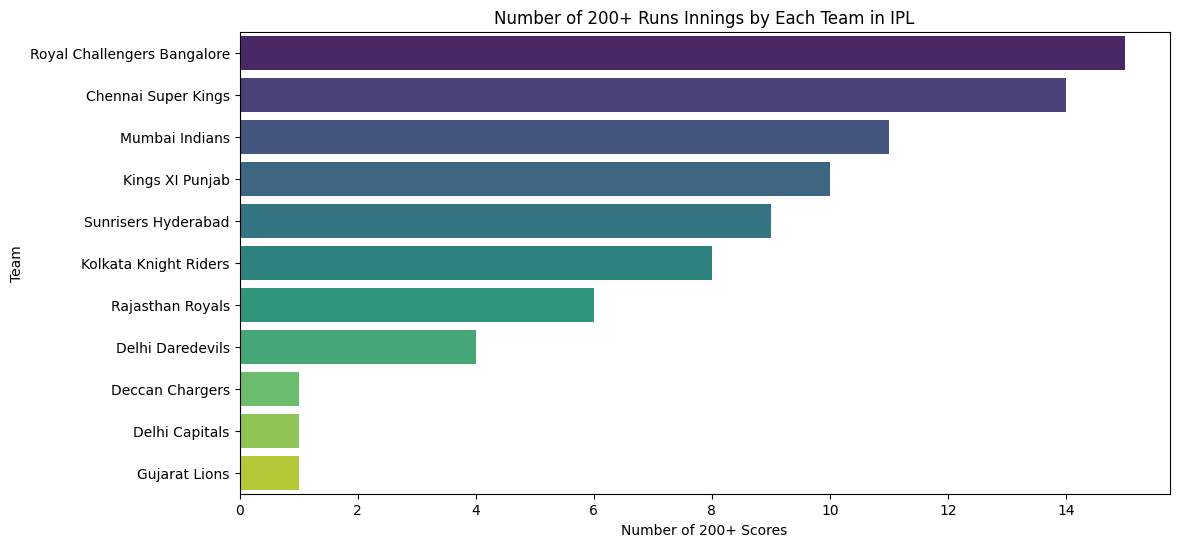

In [ ]:
# Aggregate total runs per match for each team
team_scores = deliveries_df.groupby(["match_id", "batting_team"])["total_runs"].sum().reset_index()

# Filter matches where a team scored 200+ runs
high_scores = team_scores[team_scores["total_runs"] >= 200]

# Count the number of 200+ innings per team
high_scores_count = high_scores.groupby("batting_team")["match_id"].count().reset_index()
high_scores_count.rename(columns={"match_id": "200+ Scores"}, inplace=True)

# Sort by number of 200+ scores
high_scores_count = high_scores_count.sort_values(by="200+ Scores", ascending=False)

# Display result
print(high_scores_count)

# Plot the number of 200+ innings by each team
plt.figure(figsize=(12, 6))
sns.barplot(x="200+ Scores", y="batting_team", data=high_scores_count, palette="viridis")
plt.xlabel("Number of 200+ Scores")
plt.ylabel("Team")
plt.title("Number of 200+ Runs Innings by Each Team in IPL")
plt.show()


In [ ]:
# Load CSV while handling errors
try:
    deliveries_df = pd.read_csv("deliveries.csv", on_bad_lines="skip", delimiter=",", quoting=3)
except Exception as e:
    print("Error loading CSV:", e)
    exit()

# Display first few rows to check the structure
print(deliveries_df.head())

# Ensure 'over' column is numeric
deliveries_df['over'] = pd.to_numeric(deliveries_df['over'], errors='coerce')

# Drop rows where 'over' couldn't be converted
deliveries_df = deliveries_df.dropna(subset=['over'])
deliveries_df['over'] = deliveries_df['over'].astype(int)



   match_id  inning           batting_team                 bowling_team over  \
0    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore    0   
1    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore    0   
2    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore    0   
3    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore    0   
4    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore    0   

  ball       batter   bowler  non_striker  batsman_runs  extra_runs  \
0    1   SC Ganguly  P Kumar  BB McCullum           0.0         1.0   
1    2  BB McCullum  P Kumar   SC Ganguly           0.0         0.0   
2    3  BB McCullum  P Kumar   SC Ganguly           0.0         1.0   
3    4  BB McCullum  P Kumar   SC Ganguly           0.0         0.0   
4    5  BB McCullum  P Kumar   SC Ganguly           0.0         0.0   

   total_runs extras_type  is_wicket player_dismissed dismissal_kind fielder  
0         1.0

<ipython-input-37-fc6f9747c84b>:3: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  deliveries_df = pd.read_csv("deliveries.csv", on_bad_lines="skip", delimiter=",", quoting=3)
<ipython-input-37-fc6f9747c84b>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deliveries_df['over'] = deliveries_df['over'].astype(int)


**MOST RUNS IN DEATH OVERS(16-20)**

                   batting_team  total_runs
7                Mumbai Indians      5458.0
12  Royal Challengers Bangalore      5097.0
5               Kings XI Punjab      4693.0
0           Chennai Super Kings      4630.0
6         Kolkata Knight Riders      4566.0
3              Delhi Daredevils      4175.0
9              Rajasthan Royals      3740.0
13          Sunrisers Hyderabad      3393.0
1               Deccan Chargers      1671.0
8                 Pune Warriors       947.0
4                 Gujarat Lions       921.0
10       Rising Pune Supergiant       555.0
11      Rising Pune Supergiants       443.0
2                Delhi Capitals       255.0


<ipython-input-36-66128583c2a6>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=death_over_runs, x="total_runs", y="batting_team", palette="coolwarm")


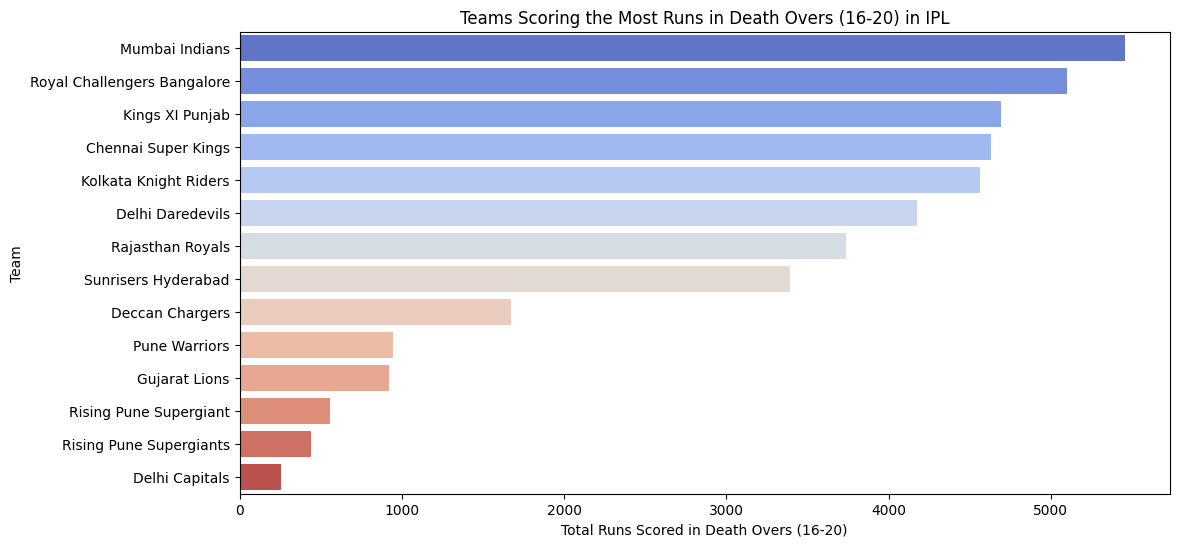

In [ ]:
# Filter deliveries from overs 16-20
death_overs = deliveries_df[(deliveries_df["over"] >= 16) & (deliveries_df["over"] <= 20)]

# Group by team and sum runs
death_over_runs = death_overs.groupby("batting_team")["total_runs"].sum().reset_index()

# Sort in descending order
death_over_runs = death_over_runs.sort_values(by="total_runs", ascending=False)

# Display top teams
print(death_over_runs)

# Set figure size
plt.figure(figsize=(12,6))

# Plot bar chart
sns.barplot(data=death_over_runs, x="total_runs", y="batting_team", palette="coolwarm")

# Labels and title
plt.xlabel("Total Runs Scored in Death Overs (16-20)")
plt.ylabel("Team")
plt.title("Teams Scoring the Most Runs in Death Overs (16-20) in IPL")

# Show plot
plt.show()


# ***PLAYER STATISTICS AND RANKINGS***


**PLAYER OF THE MATCH**

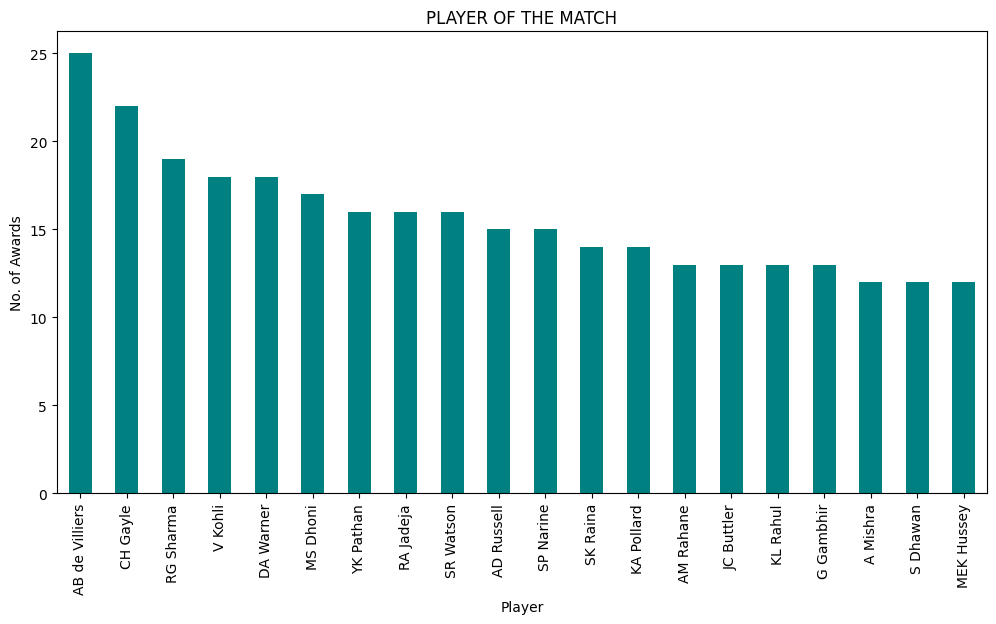

In [4]:
matches_df['player_of_match'].value_counts().head(20).plot.bar(figsize=(12, 6), color = 'teal')
plt.title("PLAYER OF THE MATCH",size=12)
plt.ylabel("No. of Awards",size=10)
plt.xlabel("Player",size=10)
plt.show()

**Top 10 Players with Most Runs in IPL History**

           batter  total_runs
0        SK Raina        4381
1         V Kohli        4269
2       RG Sharma        3928
3       G Gambhir        3863
4       DA Warner        3655
5        CH Gayle        3588
6      RV Uthappa        3564
7  AB de Villiers        3407
8        MS Dhoni        3393
9        S Dhawan        3317


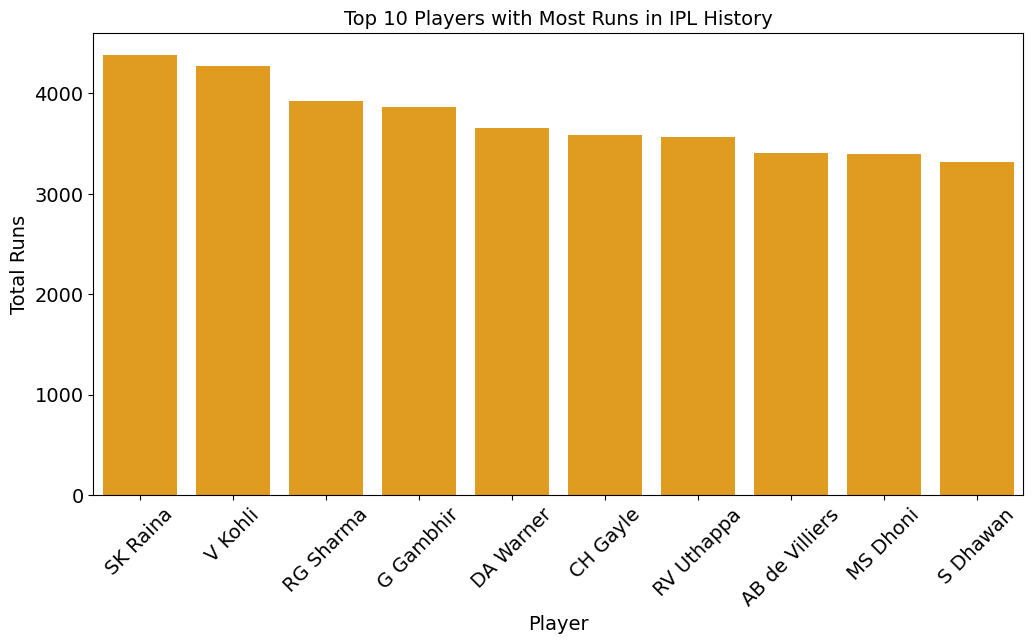

In [5]:
player_runs = deliveries_df[['batter', 'batsman_runs']]
player_runs = player_runs.groupby('batter')['batsman_runs'].sum().reset_index(name='total_runs')

# Sorting the players by total runs
top_players = player_runs.sort_values(by='total_runs', ascending=False).head(10)

print(top_players.reset_index(drop=True))

# Plotting the data
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(data=top_players, x='batter', y='total_runs',color = 'orange')

# # Adding titles and labels
plt.title('Top 10 Players with Most Runs in IPL History', fontsize=14)
plt.xlabel('Player', fontsize=14)
plt.ylabel('Total Runs', fontsize=14)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.show()

**TOP 10 PLAYERS WITH MOST SIXES**

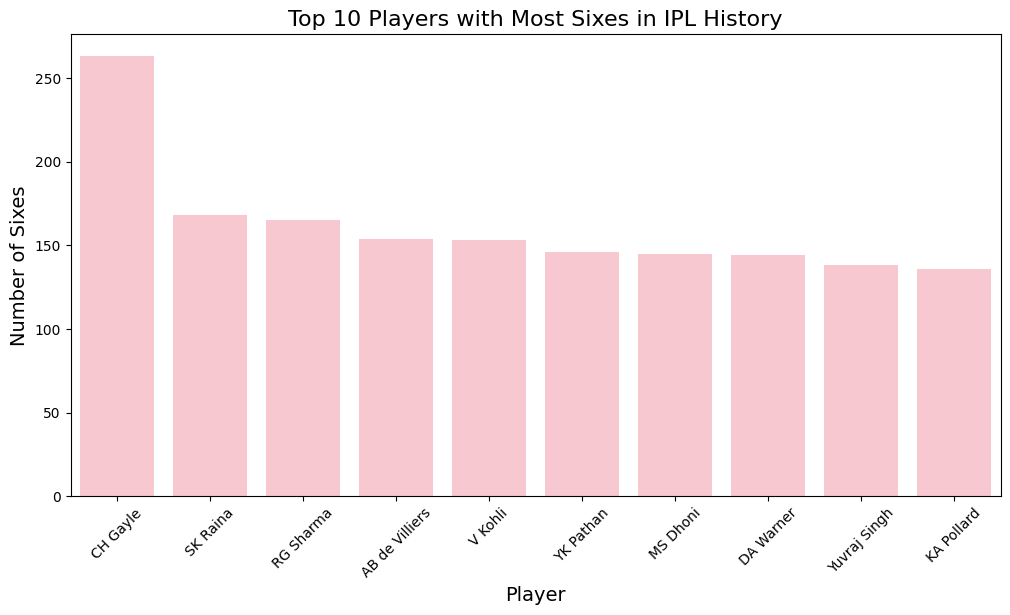

In [6]:
most_sixes = deliveries_df[deliveries_df['batsman_runs'] == 6]['batter'].value_counts().head(10)
most_sixes_df = most_sixes.reset_index()
most_sixes_df.columns = ['batter', 'sixes']

# Plotting the data
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(data=most_sixes_df, x='batter', y='sixes',color = 'pink')

# Adding titles and labels
plt.title('Top 10 Players with Most Sixes in IPL History', fontsize=16)
plt.xlabel('Player', fontsize=14)
plt.ylabel('Number of Sixes', fontsize=14)
plt.xticks(rotation=45)
plt.show()

**TOP 10 PLAYERS WITH MOST FOURS**

In [ ]:
most_fours = deliveries_df[deliveries_df['batsman_runs'] == 4]['batter'].value_counts().head(10)
most_fours_df = most_sixes.reset_index()
most_fours_df.columns = ['batter', 'sixes']

# Plotting the data
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(data=most_fours_df, x='batter', y='sixes',palette = 'twilight')

# Adding titles and labels
plt.title('Top 10 Players with Most Fours in IPL History', fontsize=16)
plt.xlabel('Player', fontsize=14)
plt.ylabel('Number of Fours', fontsize=14)
plt.xticks(rotation=45)
plt.show()

**TOP 10 PLAYERS WITH MOST THREES**

In [ ]:
most_threes = deliveries_df[deliveries_df['batsman_runs'] == 4]['batter'].value_counts().head(10)
most_threes_df = most_sixes.reset_index()
most_threes_df.columns = ['batter', 'sixes']

# Plotting the data
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(data=most_threes_df, x='batter', y='sixes',palette = 'spring')

# Adding titles and labels
plt.title('Top 10 Players with Most Threes in IPL History', fontsize=16)
plt.xlabel('Player', fontsize=14)
plt.ylabel('Number of Fours', fontsize=14)

plt.show()

**Top Batsmen with Highest Strike Rates**

In [ ]:
batsman_stats = deliveries_df.groupby("batter").agg(total_runs=("batsman_runs", "sum"), balls_faced=("ball", "count"))

batsman_stats["strike_rate"] = (batsman_stats["total_runs"] / batsman_stats["balls_faced"]) * 100

# (minimum 200 balls faced for reliability)
top_batsmen = batsman_stats[batsman_stats["balls_faced"] >= 200].nlargest(10, "strike_rate")

print("\nTop 10 Batsmen with Highest Strike Rate:")
print(top_batsmen)

# Plotting the data
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(data=top_batsmen, x='batter', y='strike_rate', palette='PiYG')

# Adding titles and labels
plt.title('Top Batsmen with Highest Strike Rates ', fontsize=16)
plt.xlabel('Batsmen', fontsize=14)
plt.ylabel('Strike Rate', fontsize=14)
plt.show()

**Top 10 Wicket-Takers in IPL History**

            bowler  total_wicket
0       SL Malinga         163.0
1         A Mishra         139.0
2         DJ Bravo         137.0
3  Harbhajan Singh         131.0
4        PP Chawla         129.0
5    R Vinay Kumar         123.0
6          A Nehra         117.0
7           Z Khan         115.0
8         R Ashwin         110.0
9          B Kumar         105.0


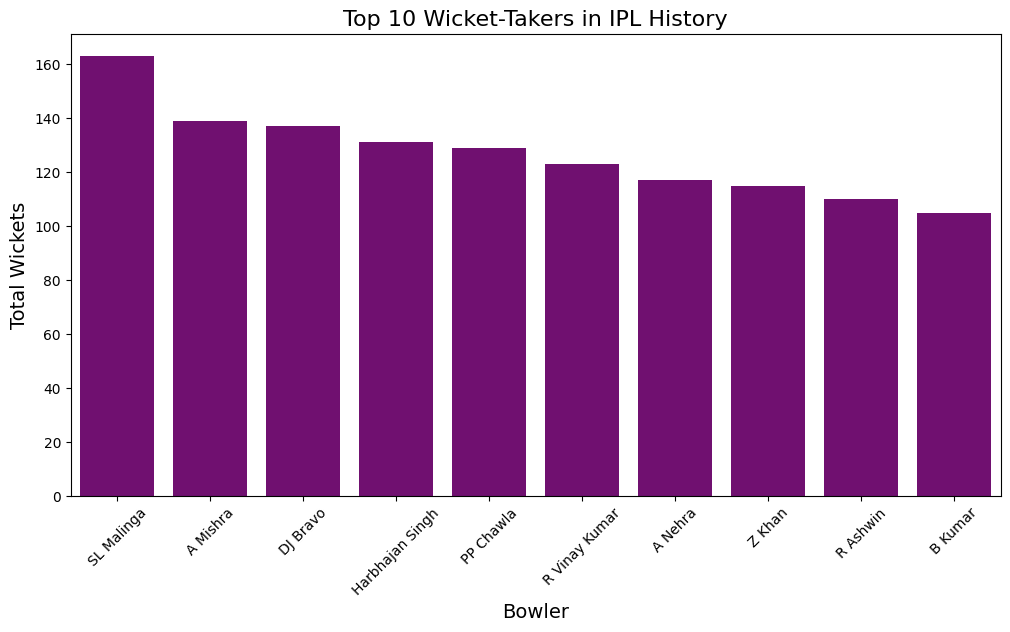

In [7]:
most_wicket_taker = deliveries_df[['bowler', 'is_wicket']]
most_wicket_taker = most_wicket_taker.groupby('bowler')['is_wicket'].sum().reset_index(name='total_wicket')
most_wicket_taker = most_wicket_taker.sort_values(by='total_wicket', ascending=False).reset_index(drop=True)

#top 10 wicket-takers
top_wicket_takers = most_wicket_taker.head(10)
print(top_wicket_takers)

# Plotting the data
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(data=top_wicket_takers, x='bowler', y='total_wicket', color='purple')

# Adding titles and labels
plt.title('Top 10 Wicket-Takers in IPL History', fontsize=16)
plt.xlabel('Bowler', fontsize=14)
plt.ylabel('Total Wickets', fontsize=14)
plt.xticks(rotation=45)
plt.show()

**Top 15 Most Economical Bowlers**

In [8]:
runs_conceded = deliveries_df.groupby('bowler')['batsman_runs'].sum().reset_index(name='runs_conceded')
valid_deliveries = deliveries_df[~deliveries_df['extras_type'].isin(['wides', 'noballs'])]

# Counting the number of balls bowled for valid deliveries
balls_bowled = valid_deliveries.groupby('bowler')['ball'].count().reset_index(name='balls_bowled')
balls_bowled['overs_bowled'] = balls_bowled['balls_bowled'] / 6

#Merging runs conceded and balls bowled data
bowler_stats = pd.merge(runs_conceded, balls_bowled[['bowler', 'overs_bowled']], on='bowler', how='left')

#Calculating the economy rate
bowler_stats['economy_rate'] = bowler_stats['runs_conceded'] / bowler_stats['overs_bowled']

#Sorting the bowlers by economy rate
most_economical_bowlers = bowler_stats.sort_values(by='economy_rate').reset_index(drop=True)

# Displaying the top bowlers with lowest economy rates
top_15_most_economical_bowlers = most_economical_bowlers.head(15)

# Display the result
print(top_15_most_economical_bowlers)

               bowler  runs_conceded  overs_bowled  economy_rate
0        AC Gilchrist              0      0.166667      0.000000
1              N Rana              3      1.000000      3.000000
2            NB Singh              7      2.000000      3.500000
3         Sachin Baby              8      1.666667      4.800000
4       LA Carseldine              5      1.000000      5.000000
5           AM Rahane              5      1.000000      5.000000
6           SS Mundhe              5      1.000000      5.000000
7         DJ Thornely             38      7.000000      5.428571
8   Washington Sundar             17      3.000000      5.666667
9            K Rabada             23      4.000000      5.750000
10      Sohail Tanvir            246     41.166667      5.975709
11           M Manhas             42      7.000000      6.000000
12          MJ Clarke             67     11.000000      6.090909
13         SM Harwood             61     10.000000      6.100000
14    Mohammad Hafeez    

<ipython-input-9-03db3cebe67b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(data=top_15_most_economical_bowlers, x='economy_rate', y='bowler', palette='PiYG')


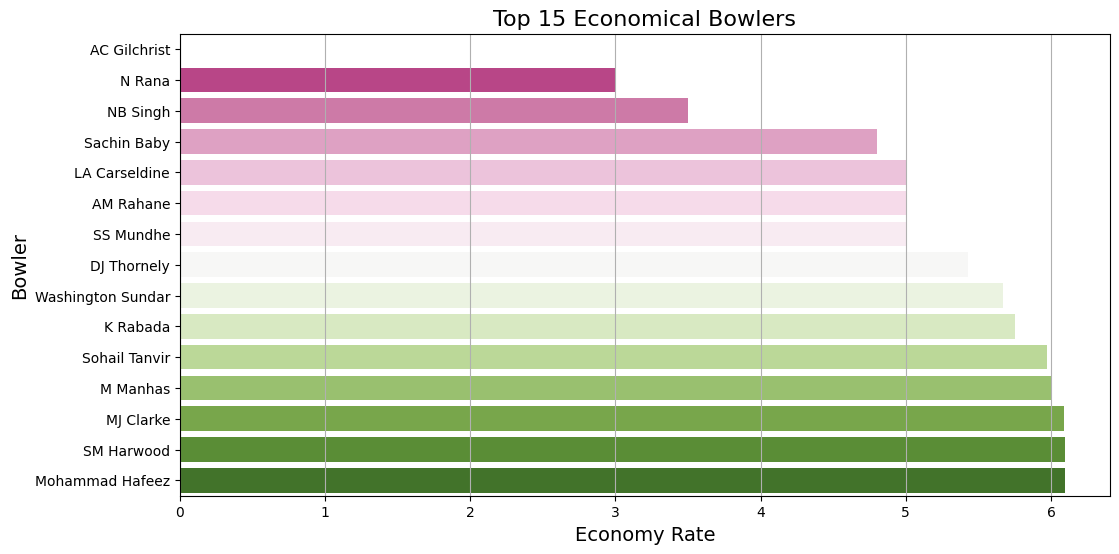

In [9]:
# Plotting the data
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(data=top_15_most_economical_bowlers, x='economy_rate', y='bowler', palette='PiYG')

# Adding titles and labels
plt.title('Top 15 Economical Bowlers', fontsize=16)
plt.xlabel('Economy Rate', fontsize=14)
plt.ylabel('Bowler', fontsize=14)
plt.grid(axis='x')
plt.show()


**Top 10 Most Expensive Bowlers in Terms of Economy Rates**

In [ ]:
most_expensive_bowlers= bowler_stats.sort_values(by='economy_rate', ascending=False).head(10).reset_index(drop=True)
most_expensive_bowlers

In [ ]:
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(data=most_expensive_bowlers, x='economy_rate', y='bowler', palette='brg')
plt.title('Top 10 Most Expensive Bowlers',fontsize=14)
plt.xlabel('Economy Rate',fontsize=14)
plt.ylabel('Bowler', fontsize=14)
plt.grid(axis='x')
plt.show()

**Most Dismissal Types**

In [ ]:
# Filtering the data for deliveries where a wicket was taken
dismissals = deliveries_df[deliveries_df['is_wicket'] == 1]

# Grouping by dismissal type and count the number of each type
dismissal_counts = dismissals.groupby('dismissal_kind')['is_wicket'].count().reset_index(name='count')

# Sorting the dismissal types by their count in descending order
dismissal_counts = dismissal_counts.sort_values(by='count', ascending=False)
dismissal_counts

In [ ]:
# Plotting the dismissal counts
plt.figure(figsize=(10, 6))
sns.countplot(x='dismissal_kind', data=dismissals, order=dismissals['dismissal_kind'].value_counts().index,color = 'red')
plt.title('Dismissal Counts', fontsize=16)
plt.xlabel('Dismissal Kind', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.show()


# ***VENUE AND TOSS IMPACT STUDY***

In [ ]:
# Filter out rows with missing values in columns of interest
matches_df = matches_df.dropna(subset=['venue', 'toss_decision', 'winner'])

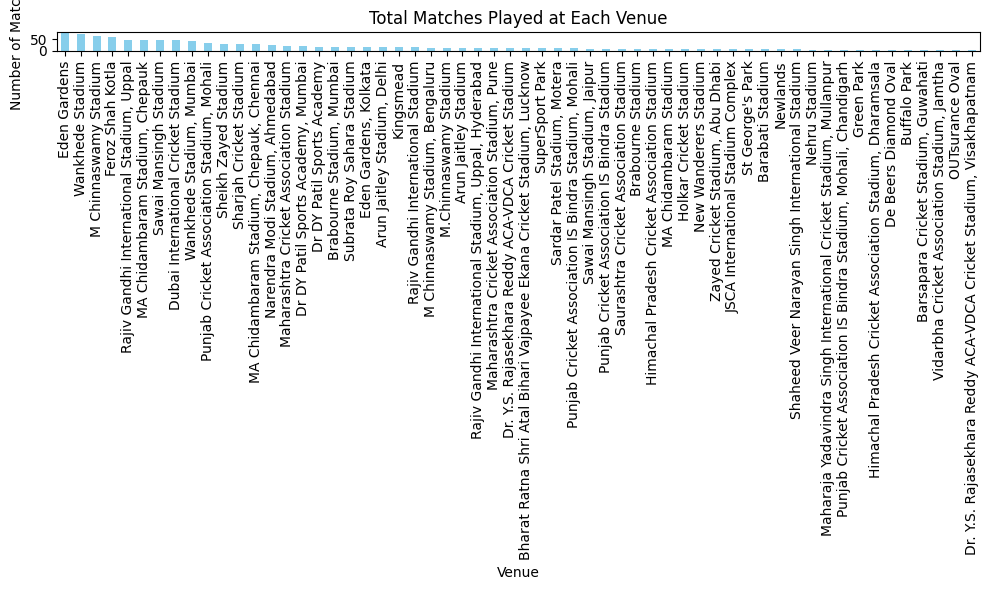

In [ ]:
# Visualization 1: Total Matches Played at Each Venue
venue_counts = matches_df['venue'].value_counts()
plt.figure(figsize=(10, 6))
venue_counts.plot(kind='bar', color='skyblue')
plt.title('Total Matches Played at Each Venue')
plt.xlabel('Venue')
plt.ylabel('Number of Matches')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

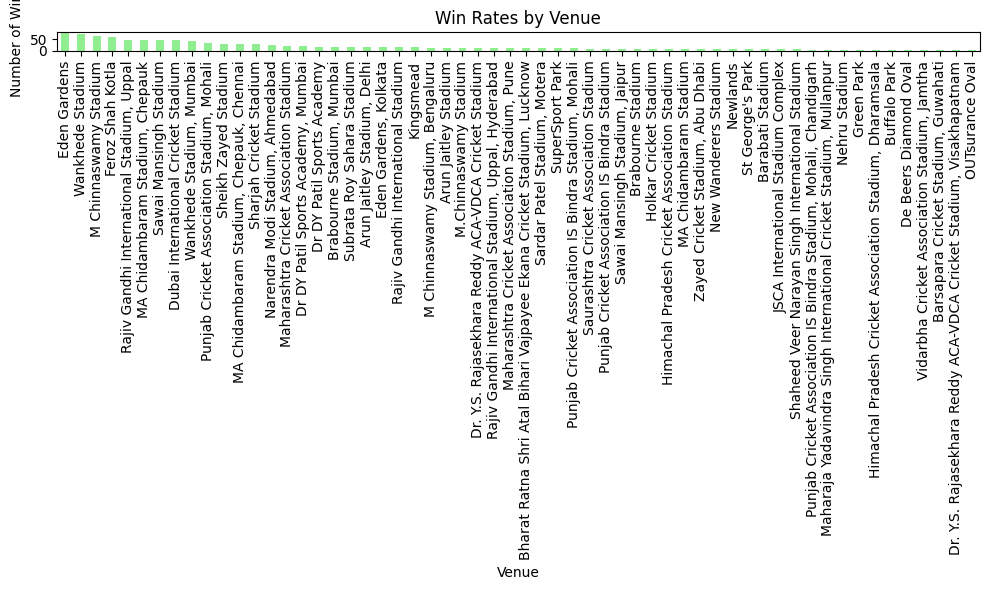

In [ ]:
# Visualization 2: Win Rates by Venue
venue_winners = matches_df.groupby('venue')['winner'].count()
plt.figure(figsize=(10, 6))
venue_winners.sort_values(ascending=False).plot(kind='bar', color='lightgreen')
plt.title('Win Rates by Venue')
plt.xlabel('Venue')
plt.ylabel('Number of Wins')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

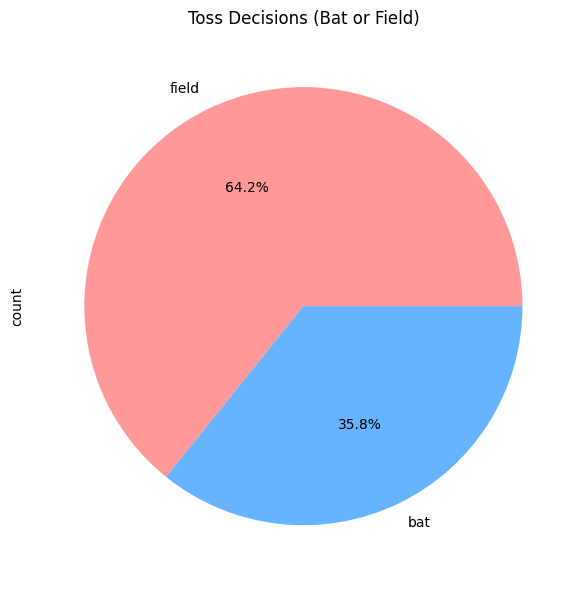

In [ ]:
# Visualization 3: Toss Decisions (Bat/Field) Across Matches
toss_decisions = matches_df['toss_decision'].value_counts()
plt.figure(figsize=(6, 6))
toss_decisions.plot.pie(autopct='%1.1f%%', colors=['#ff9999','#66b3ff'], labels=toss_decisions.index)
plt.title('Toss Decisions (Bat or Field)')
plt.tight_layout()
plt.show()

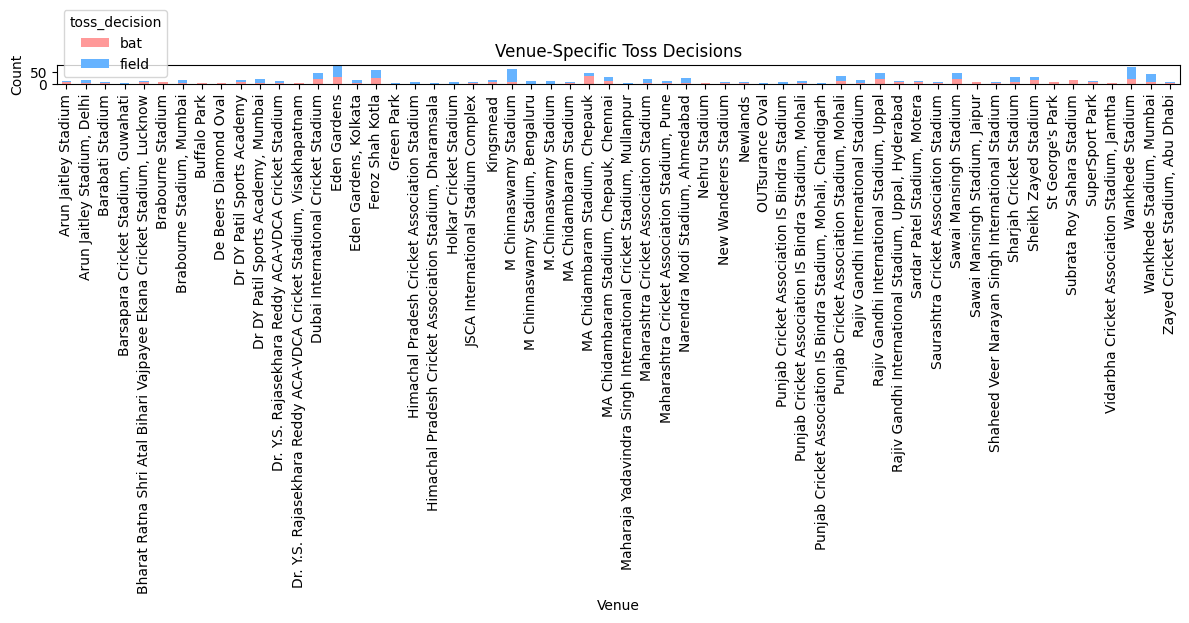

In [ ]:
# Visualization 4: Venue-Specific Toss Decisions
venue_toss = matches_df.groupby(['venue', 'toss_decision']).size().unstack()
venue_toss.plot(kind='bar', stacked=True, figsize=(12, 6), color=['#ff9999','#66b3ff'])
plt.title('Venue-Specific Toss Decisions')
plt.xlabel('Venue')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

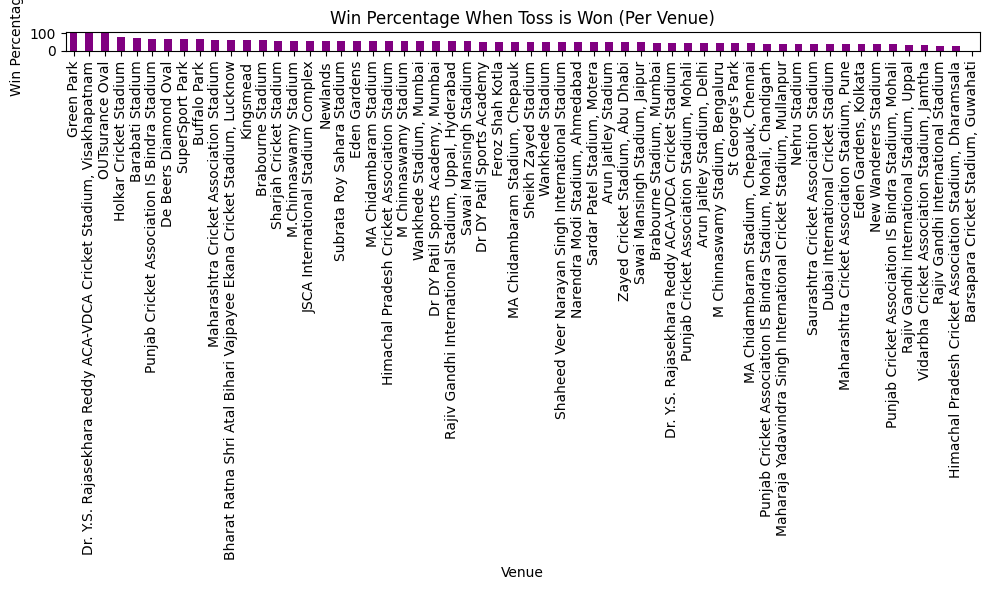

In [ ]:
# Visualization 5: Win Percentage When Toss is Won
df['toss_win_and_match_win'] = matches_df['toss_winner'] == df['winner']
toss_effect = df.groupby('venue')['toss_win_and_match_win'].mean() * 100
plt.figure(figsize=(10, 6))
toss_effect.sort_values(ascending=False).plot(kind='bar', color='purple')
plt.title('Win Percentage When Toss is Won (Per Venue)')
plt.xlabel('Venue')
plt.ylabel('Win Percentage')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

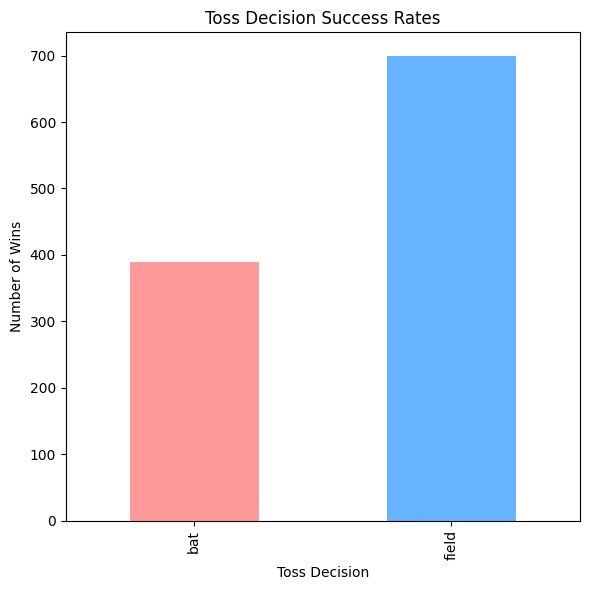

In [ ]:
# Visualization 6: Toss Decision Success Rate
toss_decision_winner = matches_df.groupby('toss_decision')['winner'].count()
plt.figure(figsize=(6, 6))
toss_decision_winner.plot(kind='bar', color=['#ff9999','#66b3ff'])
plt.title('Toss Decision Success Rates')
plt.xlabel('Toss Decision')
plt.ylabel('Number of Wins')
plt.tight_layout()
plt.show()

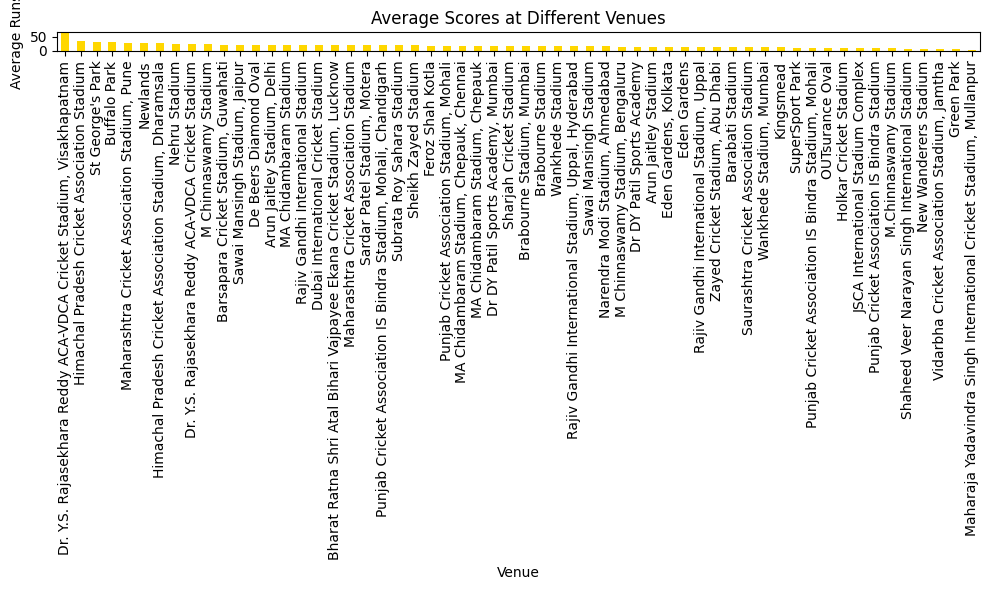

In [ ]:
# Visualization 7: Average Scores at Different Venues
df['total_runs'] = matches_df['result_margin']  # Ensure correct calculations (Optional Improvement)
average_scores = df.groupby('venue')['total_runs'].mean()
plt.figure(figsize=(10, 6))
average_scores.sort_values(ascending=False).plot(kind='bar', color='gold')
plt.title('Average Scores at Different Venues')
plt.xlabel('Venue')
plt.ylabel('Average Runs')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

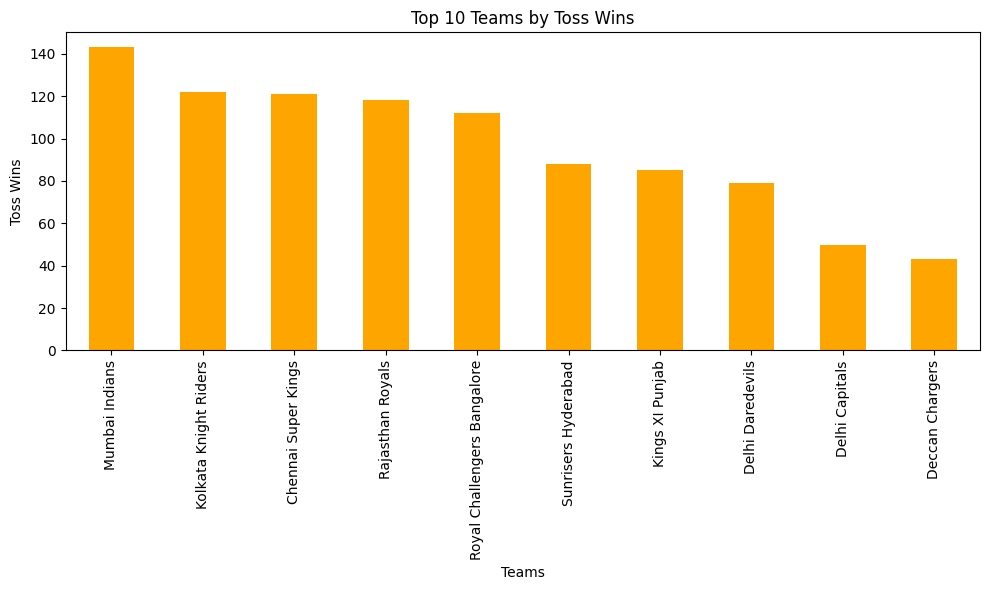

In [ ]:
# Visualization 8: Top 10 Teams by Toss Wins
team_toss_wins = matches_df['toss_winner'].value_counts().head(10)
plt.figure(figsize=(10, 6))
team_toss_wins.plot(kind='bar', color='orange')
plt.title('Top 10 Teams by Toss Wins')
plt.xlabel('Teams')
plt.ylabel('Toss Wins')
plt.tight_layout()
plt.show()

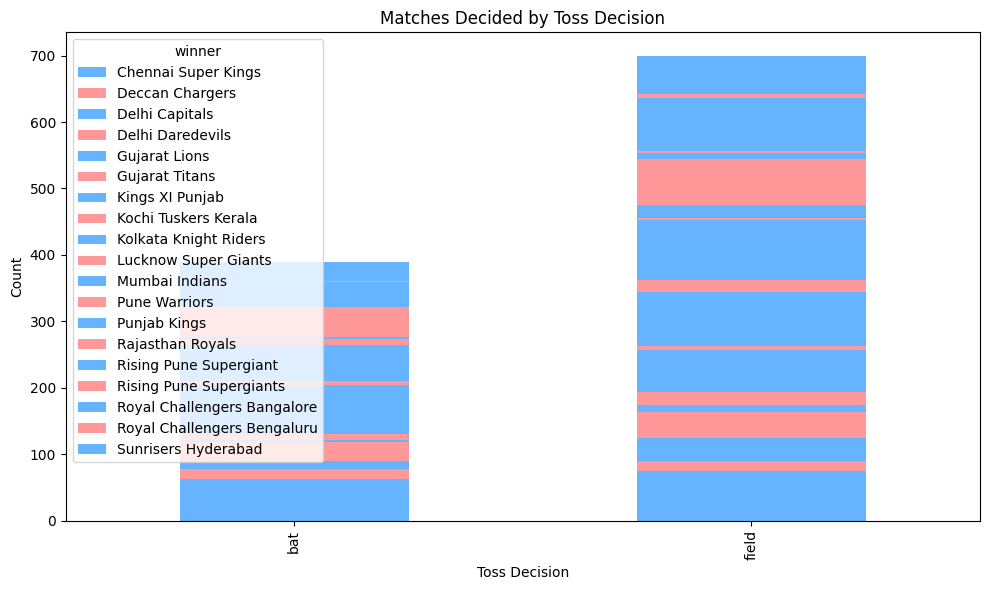

In [ ]:
# Visualization 9: Matches Decided by Toss Decision
toss_and_results = matches_df.groupby(['toss_decision', 'winner']).size().unstack()
toss_and_results.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#66b3ff', '#ff9999'])
plt.title('Matches Decided by Toss Decision')
plt.xlabel('Toss Decision')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

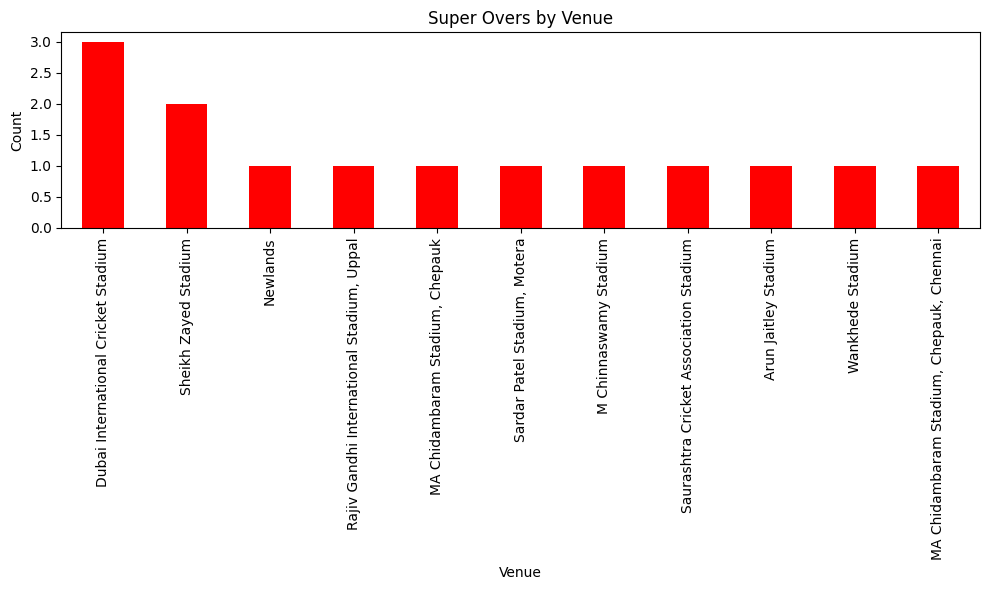

In [ ]:
# Visualization 10: Super Overs at Different Venues
super_overs = matches_df[matches_df['super_over'] == 'Y']['venue'].value_counts()
plt.figure(figsize=(10, 6))
super_overs.plot(kind='bar', color='red')
plt.title('Super Overs by Venue')
plt.xlabel('Venue')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# ***HEAD TO HEAD COMPARISONS***

In [ ]:
matches_df['venue'].value_counts()

venue
Eden Gardens                                                             77
Wankhede Stadium                                                         73
M Chinnaswamy Stadium                                                    65
Feroz Shah Kotla                                                         60
Rajiv Gandhi International Stadium, Uppal                                49
MA Chidambaram Stadium, Chepauk                                          48
Sawai Mansingh Stadium                                                   47
Dubai International Cricket Stadium                                      46
Wankhede Stadium, Mumbai                                                 45
Punjab Cricket Association Stadium, Mohali                               35
Sheikh Zayed Stadium                                                     29
Sharjah Cricket Stadium                                                  28
MA Chidambaram Stadium, Chepauk, Chennai                                 28
Narendra Modi Stadium, Ahmedabad                                         24
Maharashtra Cricket Association Stadium                                  22
Dr DY Patil Sports Academy, Mumbai                                       20
Dr DY Patil Sports Academy                                               17
Brabourne Stadium, Mumbai                                                17
Subrata Roy Sahara Stadium                                               16
Eden Gardens, Kolkata                                                    16
Arun Jaitley Stadium, Delhi                                              16
Kingsmead                                                                15
M.Chinnaswamy Stadium                                                    15
Rajiv Gandhi International Stadium                                       15
Arun Jaitley Stadium                                                     14
Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium, Lucknow    14
M Chinnaswamy Stadium, Bengaluru                                         14
Rajiv Gandhi International Stadium, Uppal, Hyderabad                     13
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium                      13
Maharashtra Cricket Association Stadium, Pune                            13
SuperSport Park                                                          12
Sardar Patel Stadium, Motera                                             12
Punjab Cricket Association IS Bindra Stadium, Mohali                     11
Sawai Mansingh Stadium, Jaipur                                           10
Punjab Cricket Association IS Bindra Stadium                             10
Saurashtra Cricket Association Stadium                                   10
Brabourne Stadium                                                        10
Himachal Pradesh Cricket Association Stadium                              9
MA Chidambaram Stadium                                                    9
Holkar Cricket Stadium                                                    9
New Wanderers Stadium                                                     8
Zayed Cricket Stadium, Abu Dhabi                                          8
JSCA International Stadium Complex                                        7
St George's Park                                                          7
Barabati Stadium                                                          7
Newlands                                                                  7
Shaheed Veer Narayan Singh International Stadium                          6
Nehru Stadium                                                             5
Maharaja Yadavindra Singh International Cricket Stadium, Mullanpur        5
Punjab Cricket Association IS Bindra Stadium, Mohali, Chandigarh          5
Green Park                                                                4
Himachal Pradesh Cricket Association Stadium, Dharamsala                  4
De Beers Diamond Oval                     

In [ ]:
matches_df['winner'].value_counts()

winner
Mumbai Indians                 144
Chennai Super Kings            138
Kolkata Knight Riders          131
Royal Challengers Bangalore    116
Rajasthan Royals               112
Kings XI Punjab                 88
Sunrisers Hyderabad             88
Delhi Daredevils                67
Delhi Capitals                  48
Deccan Chargers                 29
Gujarat Titans                  28
Punjab Kings                    24
Lucknow Super Giants            24
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Royal Challengers Bengaluru      7
Kochi Tuskers Kerala             6
Draw/No Result                   5
Rising Pune Supergiants          5
Name: count, dtype: int64

In [ ]:
Teams=list(set(list(matches_df['team1'])+list(matches_df['team2'])))
len(Teams)
print(Teams)

['Punjab Kings', 'Rising Pune Supergiant', 'Chennai Super Kings', 'Kolkata Knight Riders', 'Gujarat Lions', 'Kochi Tuskers Kerala', 'Delhi Daredevils', 'Gujarat Titans', 'Pune Warriors', 'Royal Challengers Bengaluru', 'Rajasthan Royals', 'Lucknow Super Giants', 'Kings XI Punjab', 'Rising Pune Supergiants', 'Delhi Capitals', 'Royal Challengers Bangalore', 'Mumbai Indians', 'Sunrisers Hyderabad', 'Deccan Chargers']


In [ ]:
merged_df = pd.merge(deliveries_df, matches_df, left_on='match_id', right_on='id')

In [ ]:
unique_stadiums = matches_df['venue'].unique()
print(unique_stadiums)



['M Chinnaswamy Stadium' 'Punjab Cricket Association Stadium, Mohali'
 'Feroz Shah Kotla' 'Wankhede Stadium' 'Eden Gardens'
 'Sawai Mansingh Stadium' 'Rajiv Gandhi International Stadium, Uppal'
 'MA Chidambaram Stadium, Chepauk' 'Dr DY Patil Sports Academy' 'Newlands'
 "St George's Park" 'Kingsmead' 'SuperSport Park' 'Buffalo Park'
 'New Wanderers Stadium' 'De Beers Diamond Oval' 'OUTsurance Oval'
 'Brabourne Stadium' 'Sardar Patel Stadium, Motera' 'Barabati Stadium'
 'Brabourne Stadium, Mumbai'
 'Vidarbha Cricket Association Stadium, Jamtha'
 'Himachal Pradesh Cricket Association Stadium' 'Nehru Stadium'
 'Holkar Cricket Stadium'
 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium'
 'Subrata Roy Sahara Stadium' 'Maharashtra Cricket Association Stadium'
 'Shaheed Veer Narayan Singh International Stadium'
 'JSCA International Stadium Complex' 'Sheikh Zayed Stadium'
 'Sharjah Cricket Stadium' 'Dubai International Cricket Stadium'
 'Punjab Cricket Association IS Bindra Stadium, Mohali'


In [ ]:
stadium_mapping = {
    'Wankhede Stadium, Mumbai': 'Wankhede Stadium',
    'Wankhede Stadium, Mumbai, India': 'Wankhede Stadium',
    'M Chinnaswamy Stadium': 'M. Chinnaswamy Stadium',
    'M. Chinnaswamy Stadium, Bangalore': 'M. Chinnaswamy Stadium',
    'M.Chinnaswamy Stadium': 'M. Chinnaswamy Stadium',
    'M Chinnaswamy Stadium, Bengaluru': 'M. Chinnaswamy Stadium',
    'Dr DY Patil Sports Academy, Mumbai': 'Dr DY Patil Sports Academy',
    'Dr DY Patil Sports Academy': 'Dr DY Patil Sports Academy',
    'Punjab Cricket Association Stadium, Mohali': 'Punjab Cricket Association IS Bindra Stadium, Mohali',
    'Punjab Cricket Association IS Bindra Stadium, Mohali, Chandigarh': 'Punjab Cricket Association IS Bindra Stadium, Mohali',
    'Feroz Shah Kotla': 'Arun Jaitley Stadium',
    'Arun Jaitley Stadium, Delhi': 'Arun Jaitley Stadium',
    'Eden Gardens': 'Eden Gardens',
    'Eden Gardens, Kolkata': 'Eden Gardens',
    'Sawai Mansingh Stadium': 'Sawai Mansingh Stadium, Jaipur',
    'Sawai Mansingh Stadium, Jaipur': 'Sawai Mansingh Stadium, Jaipur',
    'Rajiv Gandhi International Stadium, Uppal': 'Rajiv Gandhi International Stadium',
    'Rajiv Gandhi International Stadium, Uppal, Hyderabad': 'Rajiv Gandhi International Stadium',
    'MA Chidambaram Stadium, Chepauk': 'MA Chidambaram Stadium',
    'MA Chidambaram Stadium, Chepauk, Chennai': 'MA Chidambaram Stadium',
    'MA Chidambaram Stadium': 'MA Chidambaram Stadium',
    'Brabourne Stadium': 'Brabourne Stadium, Mumbai',
    'Brabourne Stadium, Mumbai': 'Brabourne Stadium, Mumbai',
    'Sardar Patel Stadium, Motera': 'Narendra Modi Stadium, Ahmedabad',
    'Narendra Modi Stadium, Ahmedabad': 'Narendra Modi Stadium, Ahmedabad',
    'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium': 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium, Visakhapatnam',
    'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium, Visakhapatnam': 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium, Visakhapatnam',
    'Subrata Roy Sahara Stadium': 'Subrata Roy Sahara Stadium',
    'Maharashtra Cricket Association Stadium': 'Maharashtra Cricket Association Stadium, Pune',
    'Maharashtra Cricket Association Stadium, Pune': 'Maharashtra Cricket Association Stadium, Pune',
    'Shaheed Veer Narayan Singh International Stadium': 'Shaheed Veer Narayan Singh International Stadium',
    'JSCA International Stadium Complex': 'JSCA International Stadium Complex',
    'Sheikh Zayed Stadium': 'Sheikh Zayed Stadium',
    'Sharjah Cricket Stadium': 'Sharjah Cricket Stadium',
    'Dubai International Cricket Stadium': 'Dubai International Cricket Stadium',
    'Saurashtra Cricket Association Stadium': 'Saurashtra Cricket Association Stadium',
    'Green Park': 'Green Park',
    'Barsapara Cricket Stadium, Guwahati': 'Barsapara Cricket Stadium, Guwahati',
    'Himachal Pradesh Cricket Association Stadium': 'Himachal Pradesh Cricket Association Stadium, Dharamsala',
    'Himachal Pradesh Cricket Association Stadium, Dharamsala': 'Himachal Pradesh Cricket Association Stadium, Dharamsala',
    'Maharaja Yadavindra Singh International Cricket Stadium, Mullanpur': 'Maharaja Yadavindra Singh International Cricket Stadium, Mullanpur',
    'Nehru Stadium': 'Nehru Stadium',
    'Holkar Cricket Stadium': 'Holkar Cricket Stadium',
    'Zayed Cricket Stadium, Abu Dhabi': 'Zayed Cricket Stadium, Abu Dhabi',
    'Newlands': 'Newlands',
    "St George's Park": "St George's Park",
    'Kingsmead': 'Kingsmead',
    'SuperSport Park': 'SuperSport Park',
    'Buffalo Park': 'Buffalo Park',
    'New Wanderers Stadium': 'New Wanderers Stadium',
    'De Beers Diamond Oval': 'De Beers Diamond Oval',
    'OUTsurance Oval': 'OUTsurance Oval',
}

In [ ]:
matches_df['venue'] = matches_df['venue'].map(lambda x: stadium_mapping.get(x, x))

In [ ]:
unique_stadiums = matches_df['venue'].unique()
print(unique_stadiums)

['M. Chinnaswamy Stadium'
 'Punjab Cricket Association IS Bindra Stadium, Mohali'
 'Arun Jaitley Stadium' 'Wankhede Stadium' 'Eden Gardens'
 'Sawai Mansingh Stadium, Jaipur' 'Rajiv Gandhi International Stadium'
 'MA Chidambaram Stadium' 'Dr DY Patil Sports Academy' 'Newlands'
 "St George's Park" 'Kingsmead' 'SuperSport Park' 'Buffalo Park'
 'New Wanderers Stadium' 'De Beers Diamond Oval' 'OUTsurance Oval'
 'Brabourne Stadium, Mumbai' 'Narendra Modi Stadium, Ahmedabad'
 'Barabati Stadium' 'Vidarbha Cricket Association Stadium, Jamtha'
 'Himachal Pradesh Cricket Association Stadium, Dharamsala'
 'Nehru Stadium' 'Holkar Cricket Stadium'
 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium, Visakhapatnam'
 'Subrata Roy Sahara Stadium'
 'Maharashtra Cricket Association Stadium, Pune'
 'Shaheed Veer Narayan Singh International Stadium'
 'JSCA International Stadium Complex' 'Sheikh Zayed Stadium'
 'Sharjah Cricket Stadium' 'Dubai International Cricket Stadium'
 'Saurashtra Cricket Associatio

In [ ]:
Teams=list(set(list(matches_df['team1'])+list(matches_df['team2'])))
len(Teams)
print(Teams)

['Punjab Kings', 'Rising Pune Supergiant', 'Chennai Super Kings', 'Kolkata Knight Riders', 'Gujarat Lions', 'Kochi Tuskers Kerala', 'Delhi Daredevils', 'Gujarat Titans', 'Pune Warriors', 'Royal Challengers Bengaluru', 'Rajasthan Royals', 'Lucknow Super Giants', 'Kings XI Punjab', 'Rising Pune Supergiants', 'Delhi Capitals', 'Royal Challengers Bangalore', 'Mumbai Indians', 'Sunrisers Hyderabad', 'Deccan Chargers']


In [ ]:
team1 = 'Kolkata Knight Riders'
team2 = 'Delhi Capitals'
global_palette = {
    'Mumbai Indians': 'blue',
    'Chennai Super Kings': 'yellow',
    'Rajasthan Royals': 'pink',
    'Punjab Kings': 'red',
    'Kings XI Punjab': 'red',
    'Royal Challengers Bangalore': 'green',
    'Royal Challengers Bengaluru': 'green',
    'Kolkata Knight Riders': 'purple',
    'Delhi Capitals': 'orange',
    'Delhi Daredevils': 'orange',
    'Sunrisers Hyderabad': 'orange',
    'Deccan Chargers': 'orange',
    'Lucknow Super Giants': 'teal',
    'Gujarat Titans': 'navy',


}
head_to_head = merged_df[((merged_df['team1'] == team1) & (merged_df['team2'] == team2)) |
                          ((merged_df['team1'] == team2) & (merged_df['team2'] == team1))]
print(head_to_head.head())

      match_id  inning           batting_team      bowling_team  over  ball  \
8223    336017       1  Kolkata Knight Riders  Delhi Daredevils     0     1   
8224    336017       1  Kolkata Knight Riders  Delhi Daredevils     0     2   
8225    336017       1  Kolkata Knight Riders  Delhi Daredevils     0     3   
8226    336017       1  Kolkata Knight Riders  Delhi Daredevils     0     4   
8227    336017       1  Kolkata Knight Riders  Delhi Daredevils     0     5   

           batter      bowler  non_striker  batsman_runs  ...  toss_decision  \
8223  Salman Butt  GD McGrath     A Chopra             0  ...            bat   
8224     A Chopra  GD McGrath  Salman Butt             0  ...            bat   
8225     A Chopra  GD McGrath  Salman Butt             0  ...            bat   
8226     A Chopra  GD McGrath  Salman Butt             1  ...            bat   
8227  Salman Butt  GD McGrath     A Chopra             0  ...            bat   

                     winner result  result_m

In [ ]:
team_mapping = {
    "Kings XI Punjab": "Punjab Kings",
    "Delhi Daredevils": "Delhi Capitals",
    'Royal Challengers Bangalore':'Royal Challengers Bengaluru',
    'Deccan Chargers':'Sunrisers Hyderabad'
    }
merged_df['team1'] = merged_df['team1'].replace(team_mapping)
merged_df['team2'] = merged_df['team2'].replace(team_mapping)
merged_df['winner'] = merged_df['winner'].replace(team_mapping)
merged_df['toss_winner'] = merged_df['toss_winner'].replace(team_mapping)
head_to_head['batting_team'] = head_to_head['batting_team'].replace(team_mapping)
head_to_head['bowling_team'] = head_to_head['bowling_team'].replace(team_mapping)

<ipython-input-370-1d2d9cd345ff>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  head_to_head['batting_team'] = head_to_head['batting_team'].replace(team_mapping)
<ipython-input-370-1d2d9cd345ff>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  head_to_head['bowling_team'] = head_to_head['bowling_team'].replace(team_mapping)


In [ ]:
Teams=list(set(list(merged_df['team1'])+list(merged_df['team2'])))
len(Teams)
print(Teams)

['Mumbai Indians', 'Kochi Tuskers Kerala', 'Royal Challengers Bengaluru', 'Rajasthan Royals', 'Sunrisers Hyderabad', 'Lucknow Super Giants', 'Punjab Kings', 'Rising Pune Supergiant', 'Chennai Super Kings', 'Gujarat Titans', 'Rising Pune Supergiants', 'Kolkata Knight Riders', 'Delhi Capitals', 'Gujarat Lions', 'Pune Warriors']


In [ ]:
total_matches = head_to_head['id'].nunique()
wins_team1 = head_to_head[head_to_head['winner'] == team1]['id'].nunique()
wins_team2 = head_to_head[head_to_head['winner'] == team2]['id'].nunique()
win_percentage_team1 = (wins_team1 / total_matches) * 100
win_percentage_team2 = (wins_team2 / total_matches) * 100
print(f"Total Matches: {total_matches}")
print(f"{team1} Wins: {wins_team1} ({win_percentage_team1:.2f}%)")
print(f"{team2} Wins: {wins_team2} ({win_percentage_team2:.2f}%)")
toss_wins_team1 = head_to_head[head_to_head['toss_winner'] == team1]['id'].nunique()
toss_wins_team2 = head_to_head[head_to_head['toss_winner'] == team2]['id'].nunique()
print(f"Toss Wins for {team1}: {toss_wins_team1}")
print(f"Toss Wins for {team2}: {toss_wins_team2}")


Total Matches: 33
Kolkata Knight Riders Wins: 18 (54.55%)
Delhi Capitals Wins: 15 (45.45%)
Toss Wins for Kolkata Knight Riders: 18
Toss Wins for Delhi Capitals: 15


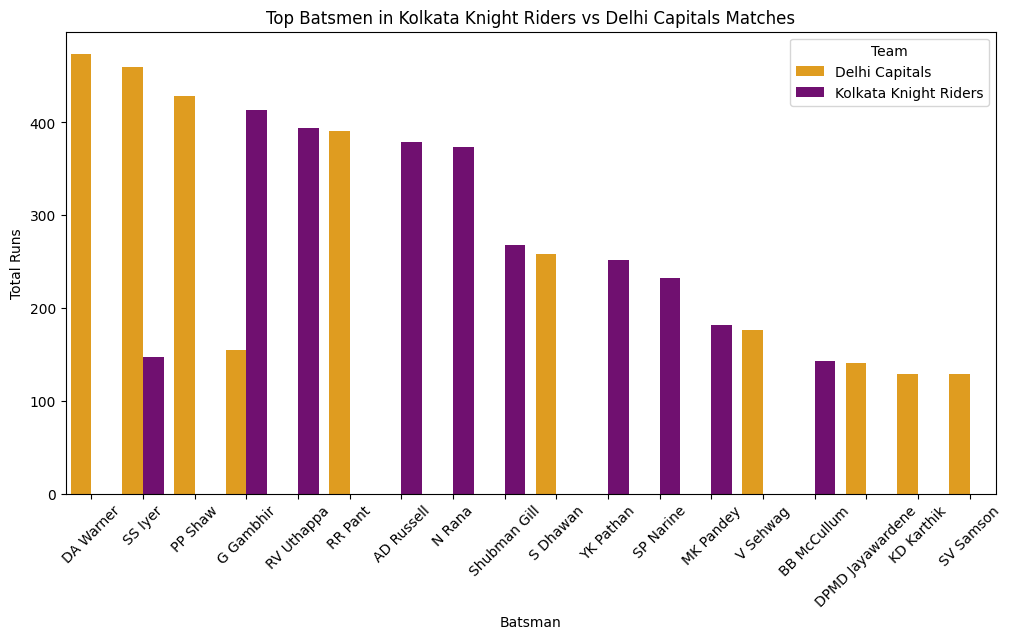

In [ ]:
batsman_runs = head_to_head.groupby(['batter', 'batting_team'])['batsman_runs'].sum().reset_index()
top_batsmen = batsman_runs.nlargest(20, 'batsman_runs')
plt.figure(figsize=(12, 6))
batting_teams = top_batsmen['batting_team'].unique()
sns.barplot(x='batter', y='batsman_runs', hue='batting_team', data=top_batsmen, palette=global_palette)
plt.title(f'Top Batsmen in {team1} vs {team2} Matches')
plt.xlabel('Batsman')
plt.ylabel('Total Runs')
plt.xticks(rotation=45)
plt.legend(title='Team')
plt.show()

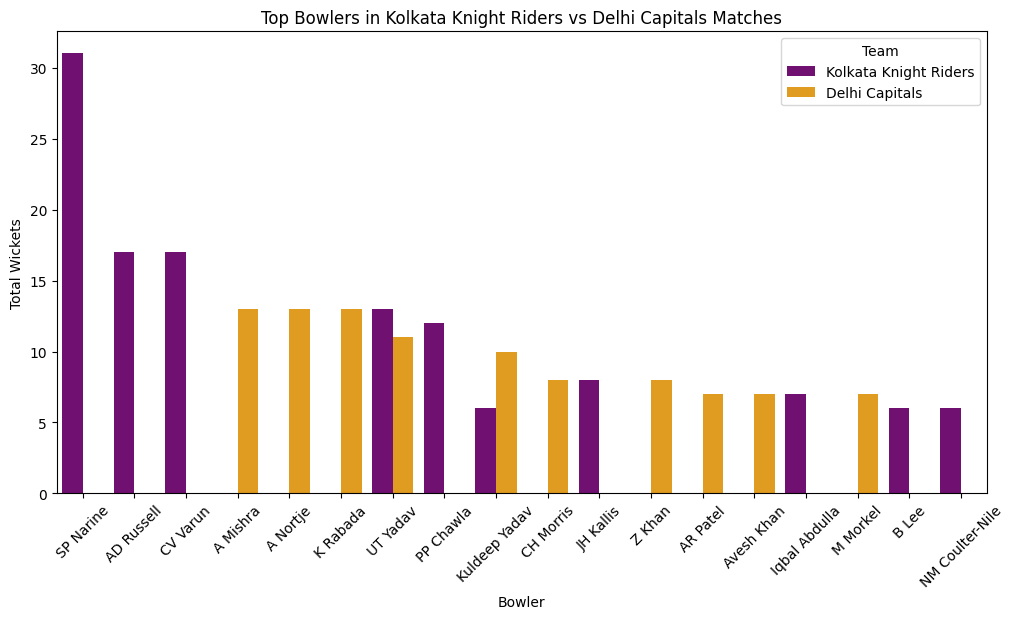

In [ ]:
bowler_wickets = head_to_head[head_to_head['is_wicket'] == 1].groupby(['bowler', 'bowling_team']).size().reset_index(name='total_wickets')
top_bowlers = bowler_wickets.nlargest(20, 'total_wickets')
plt.figure(figsize=(12, 6))
bowling_teams = top_bowlers['bowling_team'].unique()
sns.barplot(x='bowler', y='total_wickets', hue='bowling_team', data=top_bowlers, palette=global_palette)
plt.title(f'Top Bowlers in {team1} vs {team2} Matches')
plt.xlabel('Bowler')
plt.ylabel('Total Wickets')
plt.xticks(rotation=45)
plt.legend(title='Team')
plt.show()

<ipython-input-375-adfe0bed5f19>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Team', y='Toss Wins', data=toss_data, palette=global_palette)


Text(0, 0.5, 'Number of Toss Wins')

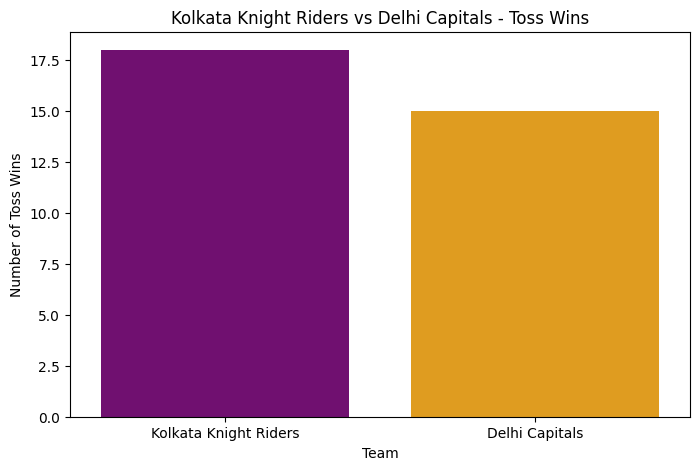

In [ ]:
toss_data = pd.DataFrame({
    'Team': [team1, team2],
    'Toss Wins': [toss_wins_team1, toss_wins_team2]})
plt.figure(figsize=(8, 5))
sns.barplot(x='Team', y='Toss Wins', data=toss_data, palette=global_palette)
plt.title(f'{team1} vs {team2} - Toss Wins')
plt.xlabel('Team')
plt.ylabel('Number of Toss Wins')

<ipython-input-376-7d2be0dd436b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[team1, team2], y=[wins_team1, wins_team2],palette=global_palette)


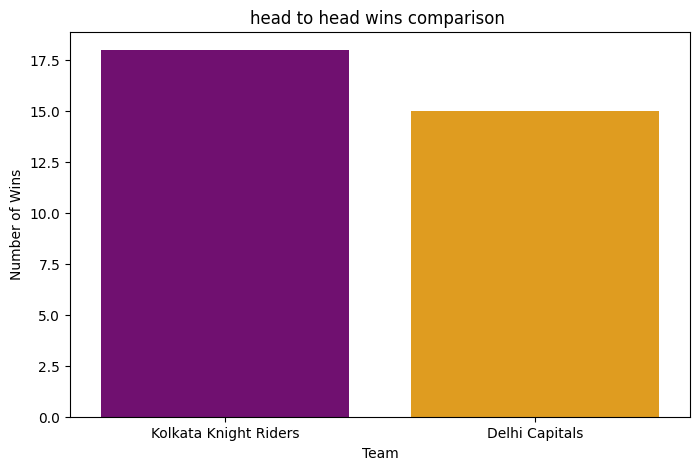

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(x=[team1, team2], y=[wins_team1, wins_team2],palette=global_palette)
plt.title(f'head to head wins comparison ')
plt.xlabel('Team')
plt.ylabel('Number of Wins')
plt.show()

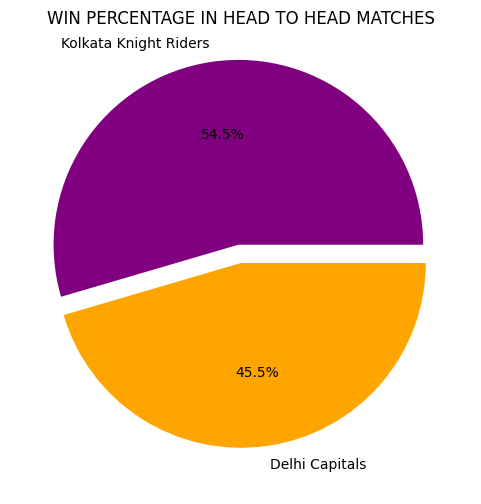

In [ ]:
labels = [team1, team2]
sizes = [win_percentage_team1, win_percentage_team2]
colors = [global_palette[team1],global_palette[team2]]
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', explode=[0.1,0])
plt.title(f'WIN PERCENTAGE IN HEAD TO HEAD MATCHES')
plt.show()

<ipython-input-378-4fce9da7a597>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  head_to_head['season'] = pd.to_datetime(head_to_head['date']).dt.year


<Figure size 1000x600 with 0 Axes>

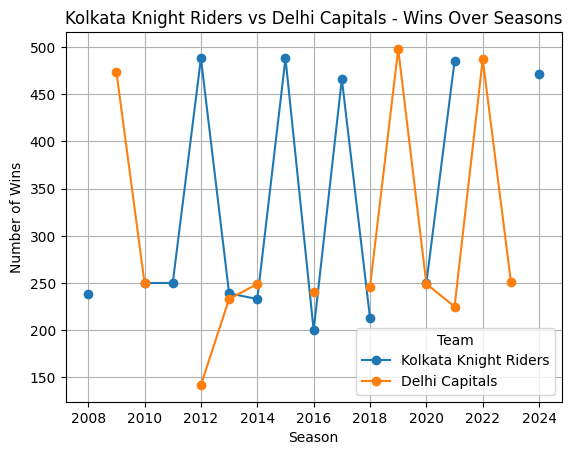

In [ ]:
head_to_head['season'] = pd.to_datetime(head_to_head['date']).dt.year
wins_over_seasons = head_to_head.groupby(['season', 'winner']).size().unstack()

plt.figure(figsize=(10, 6))
wins_over_seasons[[team1, team2]].plot(kind='line', marker='o')
plt.title(f'{team1} vs {team2} - Wins Over Seasons')
plt.xlabel('Season')
plt.ylabel('Number of Wins')
plt.legend(title='Team')
plt.grid(True)
plt.show()

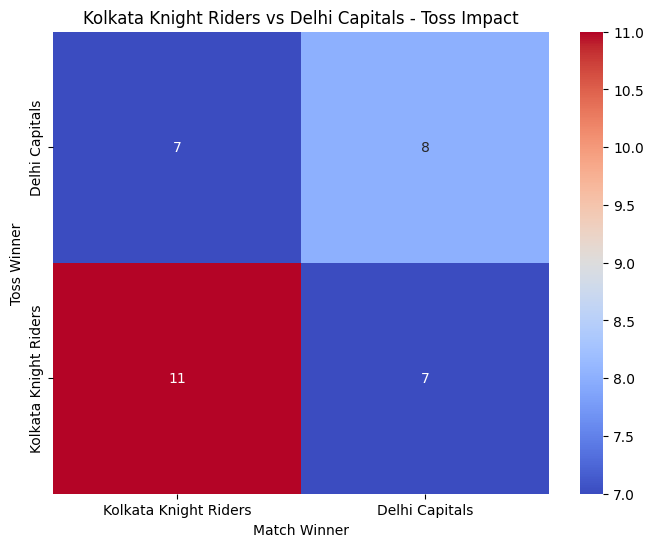

In [ ]:
toss_impact = head_to_head.groupby(['toss_winner', 'winner'])['id'].nunique().unstack().fillna(0)
for team in [team1, team2]:
    if team not in toss_impact.columns:
        toss_impact[team] = 0
toss_impact = toss_impact[[team1, team2]]
plt.figure(figsize=(8, 6))
sns.heatmap(toss_impact, annot=True, fmt='d', cmap='coolwarm')
plt.title(f'{team1} vs {team2} - Toss Impact')
plt.xlabel('Match Winner')
plt.ylabel('Toss Winner')
plt.show()

<ipython-input-380-908b71815d2b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  head_to_head['season'] = pd.to_datetime(head_to_head['date']).dt.year


<Figure size 1000x600 with 0 Axes>

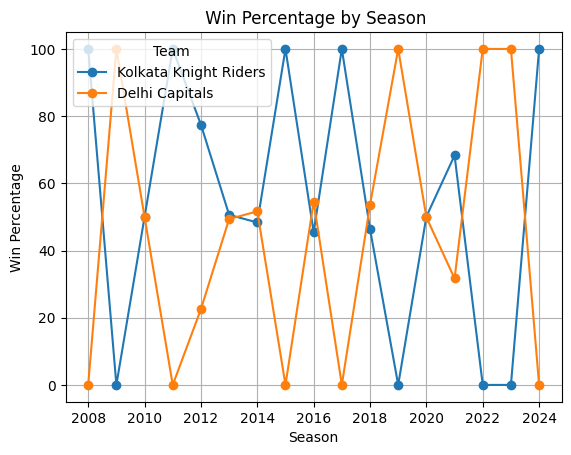

In [ ]:
head_to_head['season'] = pd.to_datetime(head_to_head['date']).dt.year
wins_by_season = head_to_head.groupby(['season', 'winner']).size().unstack().fillna(0)
win_percentage_by_season = wins_by_season.div(wins_by_season.sum(axis=1), axis=0) * 100
plt.figure(figsize=(10, 6))
win_percentage_by_season[[team1, team2]].plot(kind='line', marker='o')
plt.title(f' Win Percentage by Season')
plt.xlabel('Season')
plt.ylabel('Win Percentage')
plt.legend(title='Team')
plt.grid(True)
plt.show()

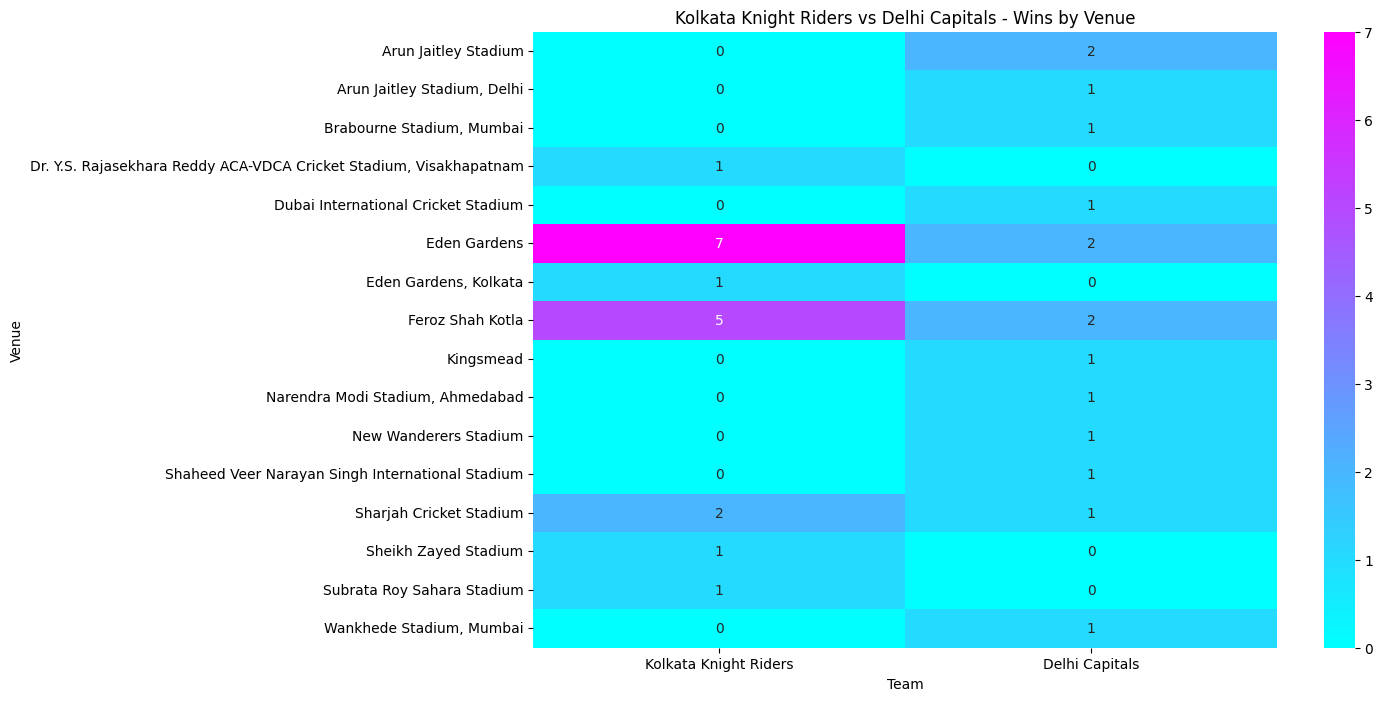

In [ ]:
wins_by_venue = head_to_head.groupby(['venue', 'winner'])['id'].nunique().unstack().fillna(0)
wins_by_venue = wins_by_venue[[team1, team2]]
plt.figure(figsize=(12, 8))
sns.heatmap(wins_by_venue, annot=True, cmap='cool')
plt.title(f'{team1} vs {team2} - Wins by Venue')
plt.xlabel('Team')
plt.ylabel('Venue')
plt.show()

Kolkata Knight Riders Total Runs: 5218
Delhi Capitals Total Runs: 5088


<ipython-input-383-5d1531be65e5>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[team1, team2], y=[team1_total_runs, team2_total_runs], palette=global_palette)


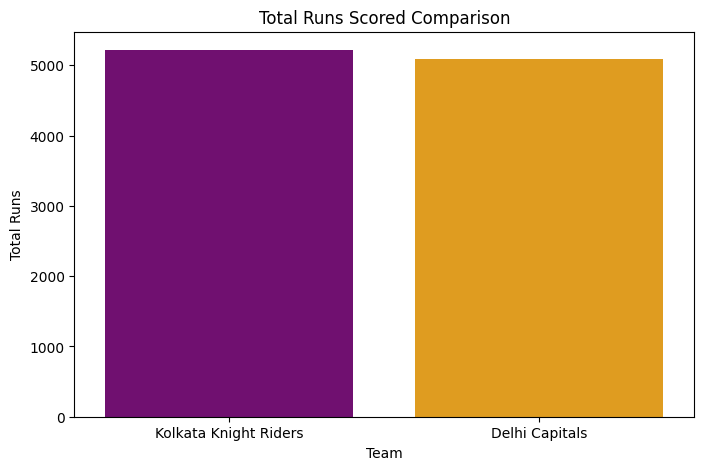

In [ ]:
team1_total_runs = head_to_head[head_to_head['batting_team'] == team1]['total_runs'].sum()
team2_total_runs = head_to_head[head_to_head['batting_team'] == team2]['total_runs'].sum()
print(f"{team1} Total Runs: {team1_total_runs}")
print(f"{team2} Total Runs: {team2_total_runs}")
plt.figure(figsize=(8, 5))
sns.barplot(x=[team1, team2], y=[team1_total_runs, team2_total_runs], palette=global_palette)
plt.title(f'Total Runs Scored Comparison')
plt.xlabel('Team')
plt.ylabel('Total Runs')
plt.show()

Kolkata Knight Riders Strike Rate: 125.03
Delhi Capitals Strike Rate: 124.39


<ipython-input-385-ca29e28e7c19>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[team1, team2], y=[team1_strike_rate, team2_strike_rate], palette=global_palette)


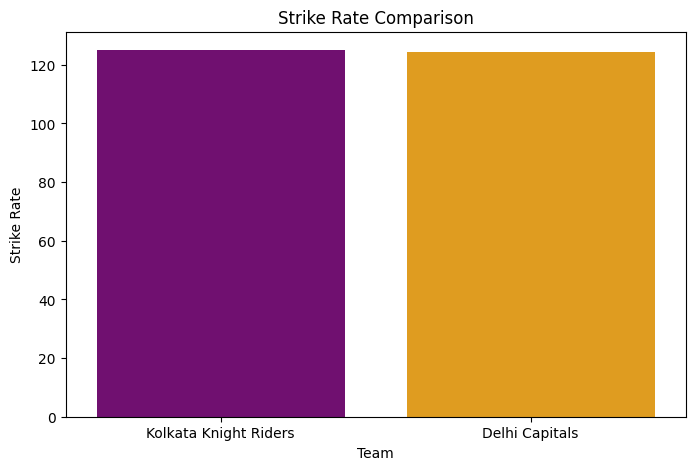

In [ ]:
team1_strike_rate = (head_to_head[head_to_head['batting_team'] == team1]['batsman_runs'].sum() / head_to_head[head_to_head['batting_team'] == team1]['ball'].count()) * 100
team2_strike_rate = (head_to_head[head_to_head['batting_team'] == team2]['batsman_runs'].sum() / head_to_head[head_to_head['batting_team'] == team2]['ball'].count()) * 100

print(f"{team1} Strike Rate: {team1_strike_rate:.2f}")
print(f"{team2} Strike Rate: {team2_strike_rate:.2f}")
plt.figure(figsize=(8, 5))
sns.barplot(x=[team1, team2], y=[team1_strike_rate, team2_strike_rate], palette=global_palette)
plt.title(f'Strike Rate Comparison')
plt.xlabel('Team')
plt.ylabel('Strike Rate')
plt.show()


# WIN PREDICTION AND TREND ANLYSIS

<ipython-input-15-c4dd4f44c5a4>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matches_df.dropna(inplace=True)
<ipython-input-15-c4dd4f44c5a4>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matches_df[col] = encoder.fit_transform(matches_df[col])
<ipython-input-15-c4dd4f44c5a4>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus

Model Accuracy: 47.71%

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.62      0.65        37
           1       0.50      1.00      0.67         2
           2       0.20      0.14      0.17         7
           3       0.46      0.46      0.46        13
           4       0.50      0.40      0.44         5
           5       0.33      0.11      0.17         9
           6       0.37      0.41      0.39        17
           7       0.00      0.00      0.00         2
           8       0.50      0.52      0.51        23
           9       0.40      0.67      0.50         3
          10       0.50      0.54      0.52        26
          11       0.33      0.33      0.33         3
          12       0.00      0.00      0.00         3
          13       0.56      0.56      0.56        25
          14       0.50      0.25      0.33         4
          16       0.37      0.38      0.38        26
          17       0.00      0.00

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
<ipython-input-15-c4dd4f44c5a4>:55: FutureWarning

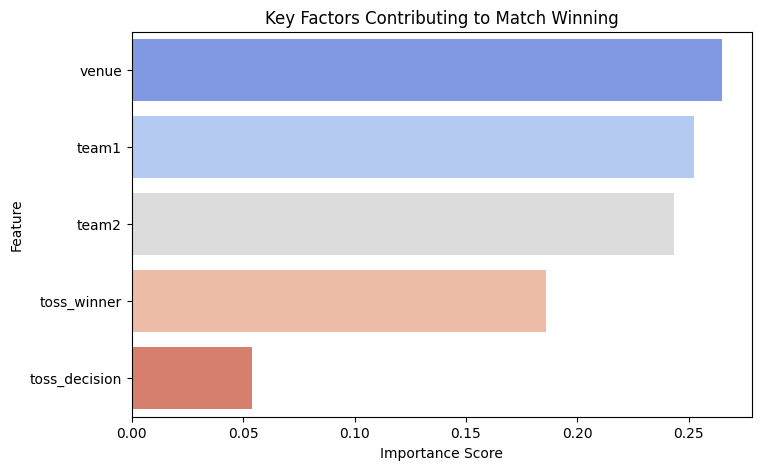

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the datasets
matches_df = pd.read_csv('/content/matches.csv')
deliveries_df = pd.read_csv('/content/deliveries.csv')

# Selecting relevant features from matches dataset
matches_df = matches_df[['season', 'team1', 'team2', 'toss_winner', 'toss_decision', 'venue', 'winner']]
matches_df.dropna(inplace=True)

# Encoding categorical variables
encoder = LabelEncoder()
for col in ['team1', 'team2', 'toss_winner', 'toss_decision', 'venue', 'winner']:
    matches_df[col] = encoder.fit_transform(matches_df[col])

# Extracting batting and bowling performance features from deliveries dataset
batsman_performance = deliveries_df.groupby('batter')['batsman_runs'].sum().reset_index()
batsman_performance.rename(columns={'batsman_runs': 'total_runs'}, inplace=True)

bowler_performance = deliveries_df.groupby('bowler')['total_runs'].sum().reset_index()
bowler_performance.rename(columns={'total_runs': 'runs_conceded'}, inplace=True)

# Defining features (X) and target (y)
X = matches_df[['team1', 'team2', 'toss_winner', 'toss_decision', 'venue']]
y = matches_df['winner']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Using a Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Analyzing feature importance
importance = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
importance = importance.sort_values(by='Importance', ascending=False)

# Plotting feature importance
plt.figure(figsize=(8, 5))
sns.barplot(x=importance['Importance'], y=importance['Feature'], palette='coolwarm')
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Key Factors Contributing to Match Winning")
plt.show()


**TOTAL MATCHES PER SEASON**

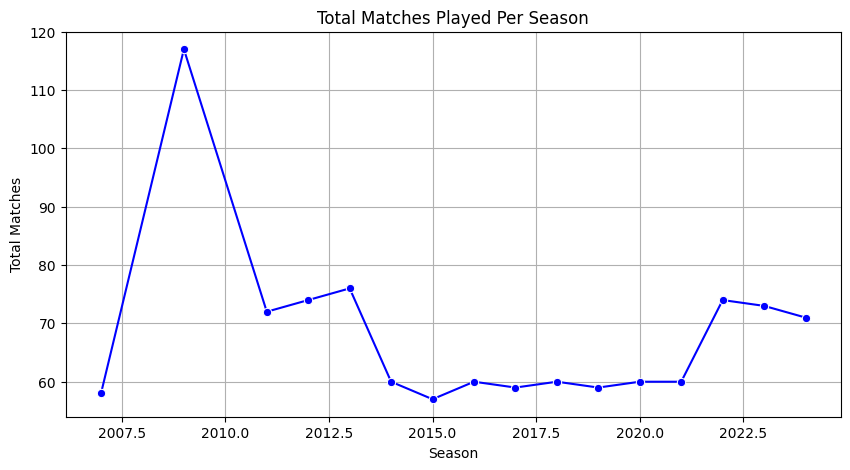

In [21]:
# Convert season to categorical type for ordering
matches_df['season'] = pd.to_numeric(matches_df['season'], errors='coerce').astype('Int64')

# Count total matches per season
matches_per_season = matches_df.groupby('season').size().reset_index(name='total_matches')

# Count team wins per season
team_wins_per_season = matches_df.groupby(['season', 'winner']).size().reset_index(name='wins')

# Plot trend of total matches per season
plt.figure(figsize=(10, 5))
sns.lineplot(x='season', y='total_matches', data=matches_per_season, marker='o', color='b')
plt.xlabel('Season')
plt.ylabel('Total Matches')
plt.title('Total Matches Played Per Season')
plt.grid()
plt.show()

**TOP WINNING TEAMS OVER SEASONS**

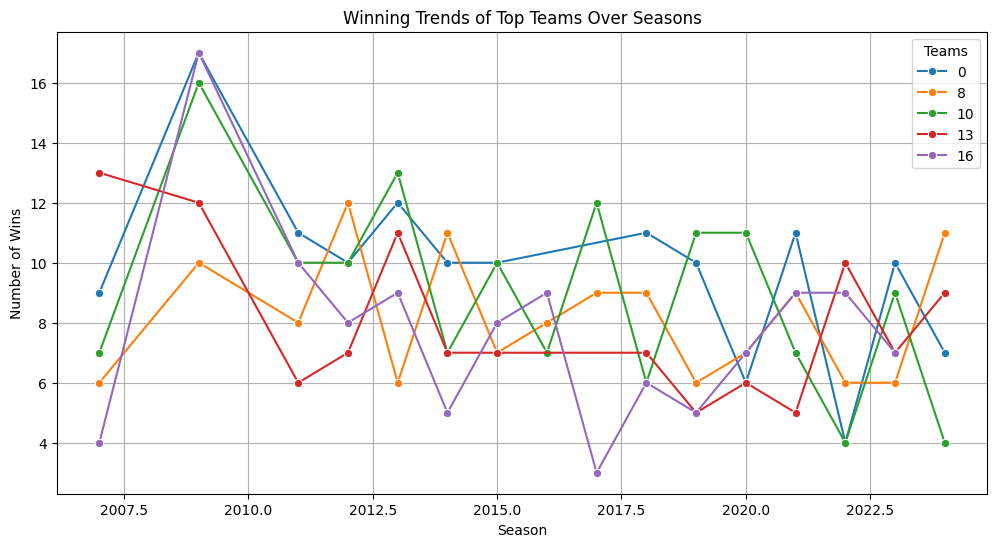

In [22]:
# Plot trend of top winning teams over seasons
top_teams = team_wins_per_season.groupby('winner')['wins'].sum().nlargest(5).index
filtered_team_wins = team_wins_per_season[team_wins_per_season['winner'].isin(top_teams)]

plt.figure(figsize=(12, 6))
sns.lineplot(x='season', y='wins', hue='winner', data=filtered_team_wins, marker='o', palette='tab10')
plt.xlabel('Season')
plt.ylabel('Number of Wins')
plt.title('Winning Trends of Top Teams Over Seasons')
plt.legend(title="Teams")
plt.grid()
plt.show()

**WINNING TEAM FREQUENCY**

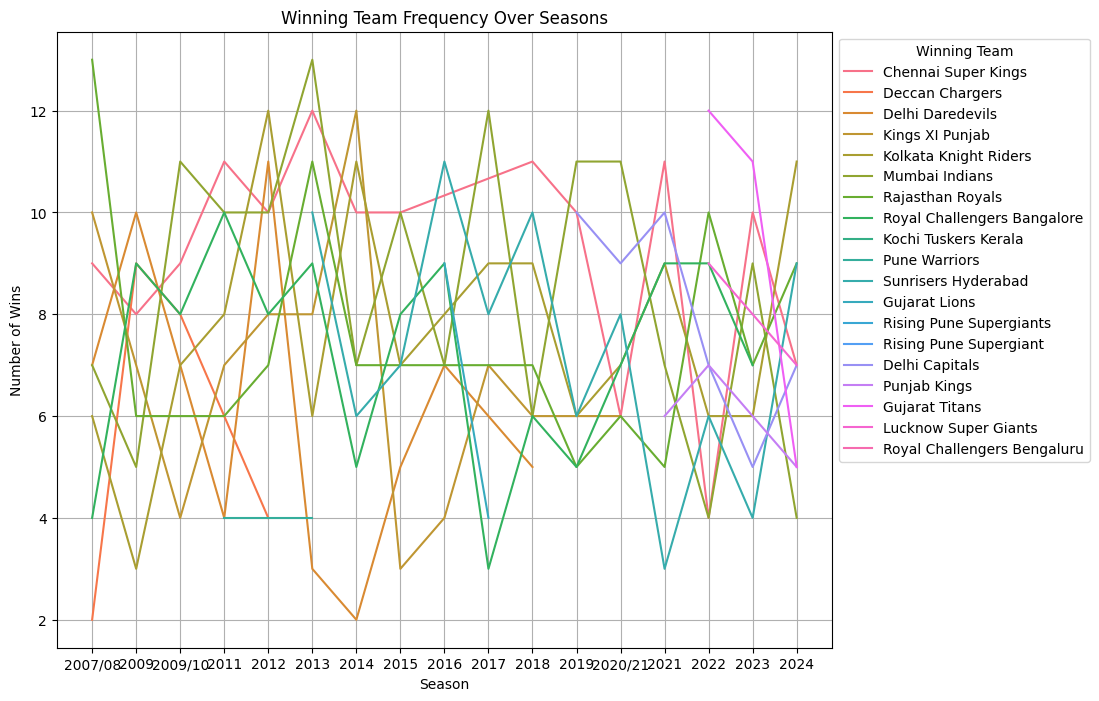

In [33]:
matches_df = pd.read_csv('/content/matches.csv')
# Trend Analysis: Winning Team Frequency Over Seasons
winner_counts_by_season = matches_df.groupby(['season', 'winner'])['id'].count().reset_index()
plt.figure(figsize=(10, 8))
sns.lineplot(x='season', y='id', hue='winner', data=winner_counts_by_season)
plt.title('Winning Team Frequency Over Seasons')
plt.xlabel('Season')
plt.ylabel('Number of Wins')
plt.legend(title='Winning Team', loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

**TOSS DECISION TRENDS OVER SEASONS**

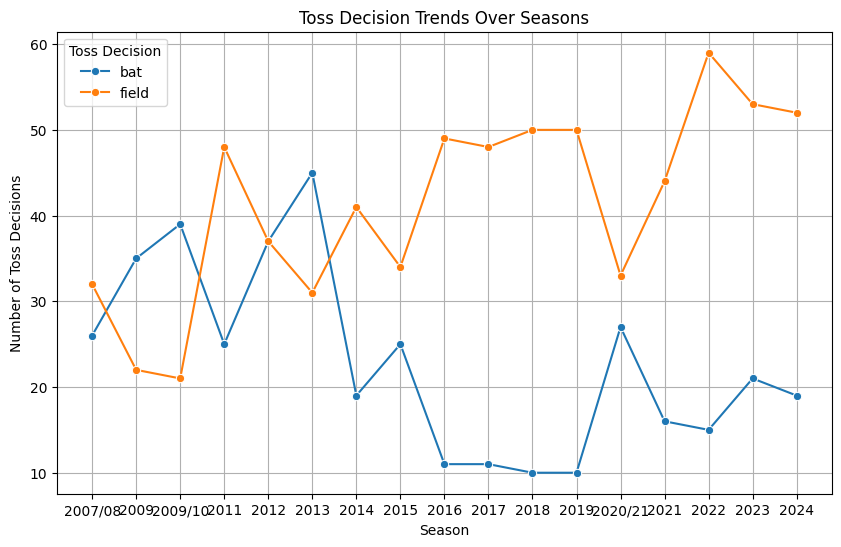

In [34]:
# Trend Analysis: Toss Decision Trends Over Seasons
toss_decision_trends = matches_df.groupby(['season', 'toss_decision'])['id'].count().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x='season', y='id', hue='toss_decision', data=toss_decision_trends, marker='o')
plt.title('Toss Decision Trends Over Seasons')
plt.xlabel('Season')
plt.ylabel('Number of Toss Decisions')
plt.legend(title='Toss Decision')
plt.grid(True)
plt.show()

**TOTAL RUNS SCORED OVER SEASONS**

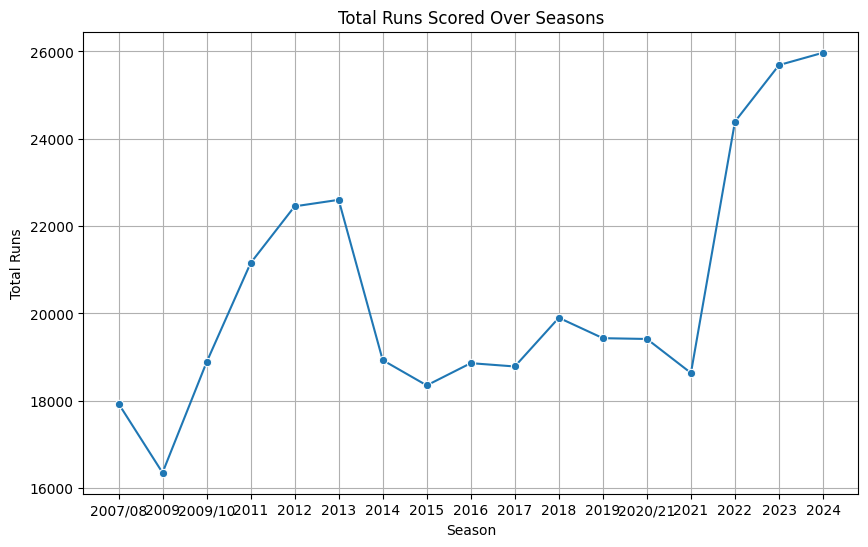

In [35]:
# Trend Analysis: Total Runs Scored Over Seasons
total_runs_per_season = deliveries_df.merge(matches_df, left_on='match_id', right_on='id').groupby('season')['total_runs'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x='season', y='total_runs', data=total_runs_per_season, marker='o')
plt.title('Total Runs Scored Over Seasons')
plt.xlabel('Season')
plt.ylabel('Total Runs')
plt.grid(True)
plt.show()

**AVERAGE RUNS SCORED PER MATCH**


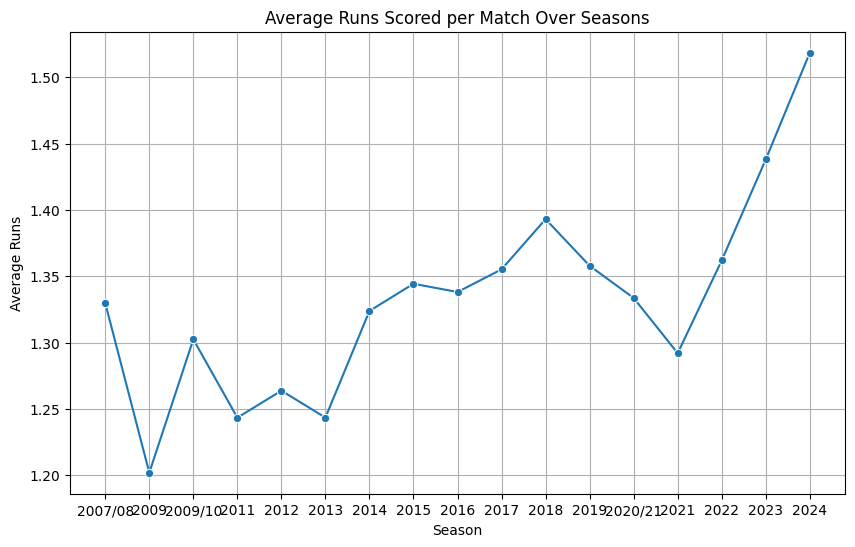

In [36]:
# Trend Analysis: Average Runs Scored per Match Over Seasons
average_runs_per_season = deliveries_df.merge(matches_df, left_on='match_id', right_on='id').groupby('season')['total_runs'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x='season', y='total_runs', data=average_runs_per_season, marker='o')
plt.title('Average Runs Scored per Match Over Seasons')
plt.xlabel('Season')
plt.ylabel('Average Runs')
plt.grid(True)
plt.show()

**VENUE IMPACT**

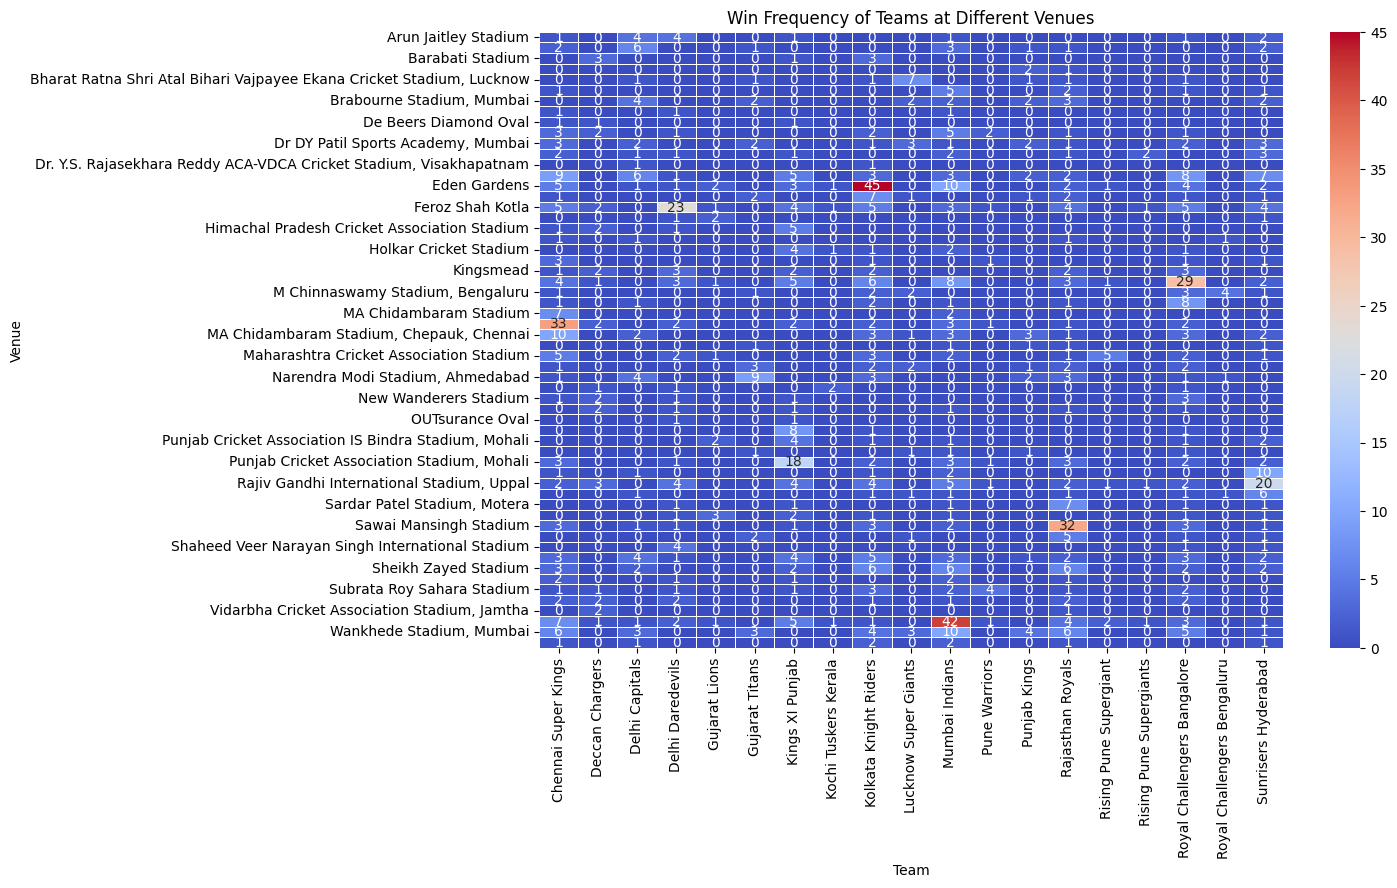

In [37]:
# Analyze the win frequency of teams at different venues.
wins_by_venue = matches_df.groupby(['venue', 'winner'])['id'].nunique().unstack().fillna(0)
plt.figure(figsize=(12, 8))
sns.heatmap(wins_by_venue, cmap="coolwarm", annot=True, fmt=".0f", linewidths=0.5)
plt.xlabel("Team")
plt.ylabel("Venue")
plt.title("Win Frequency of Teams at Different Venues")
plt.show()


**TOSS IMPACT**

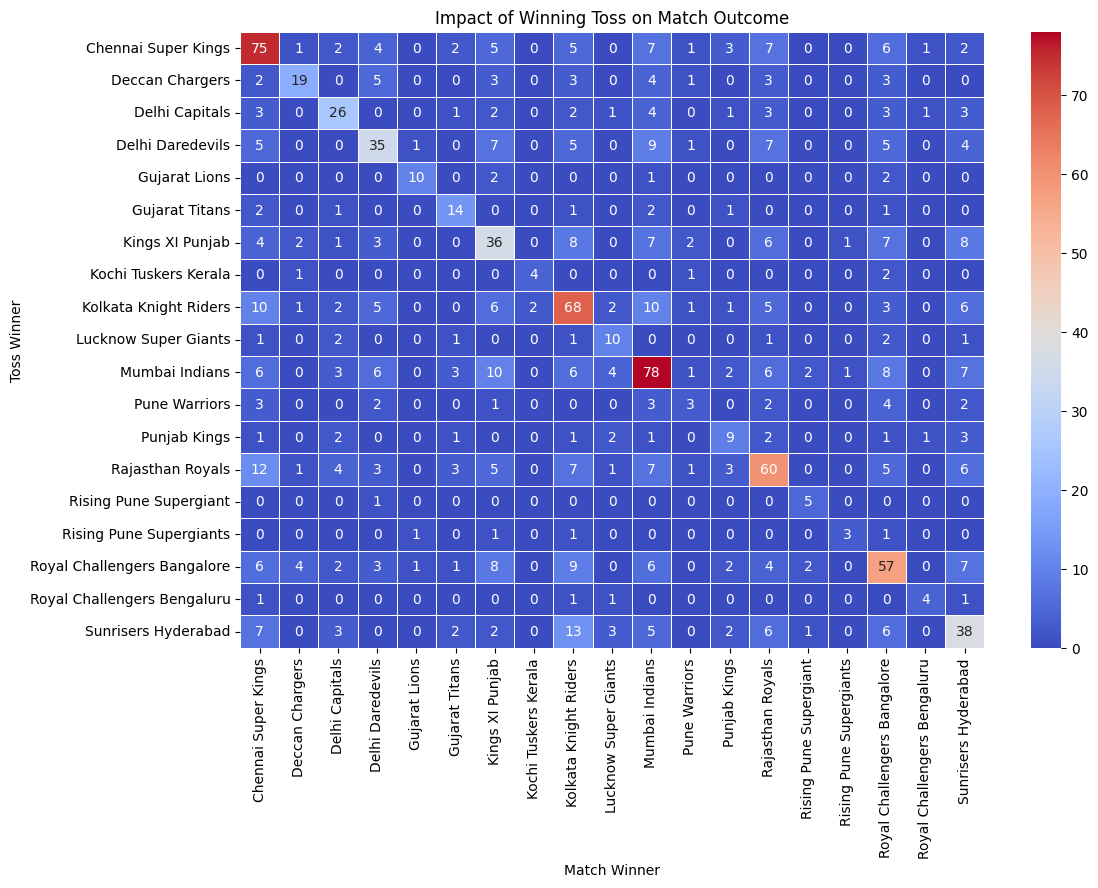

In [38]:
# Analyze the relationship between winning the toss and winning the match.
toss_impact = matches_df.groupby(['toss_winner', 'winner'])['id'].nunique().unstack().fillna(0)
plt.figure(figsize=(12, 8))
sns.heatmap(toss_impact, cmap="coolwarm", annot=True, fmt=".0f", linewidths=0.5)
plt.xlabel("Match Winner")
plt.ylabel("Toss Winner")
plt.title("Impact of Winning Toss on Match Outcome")
plt.show()


**EXAMPLE ANALYSIS FOR VENUE IMPACT**

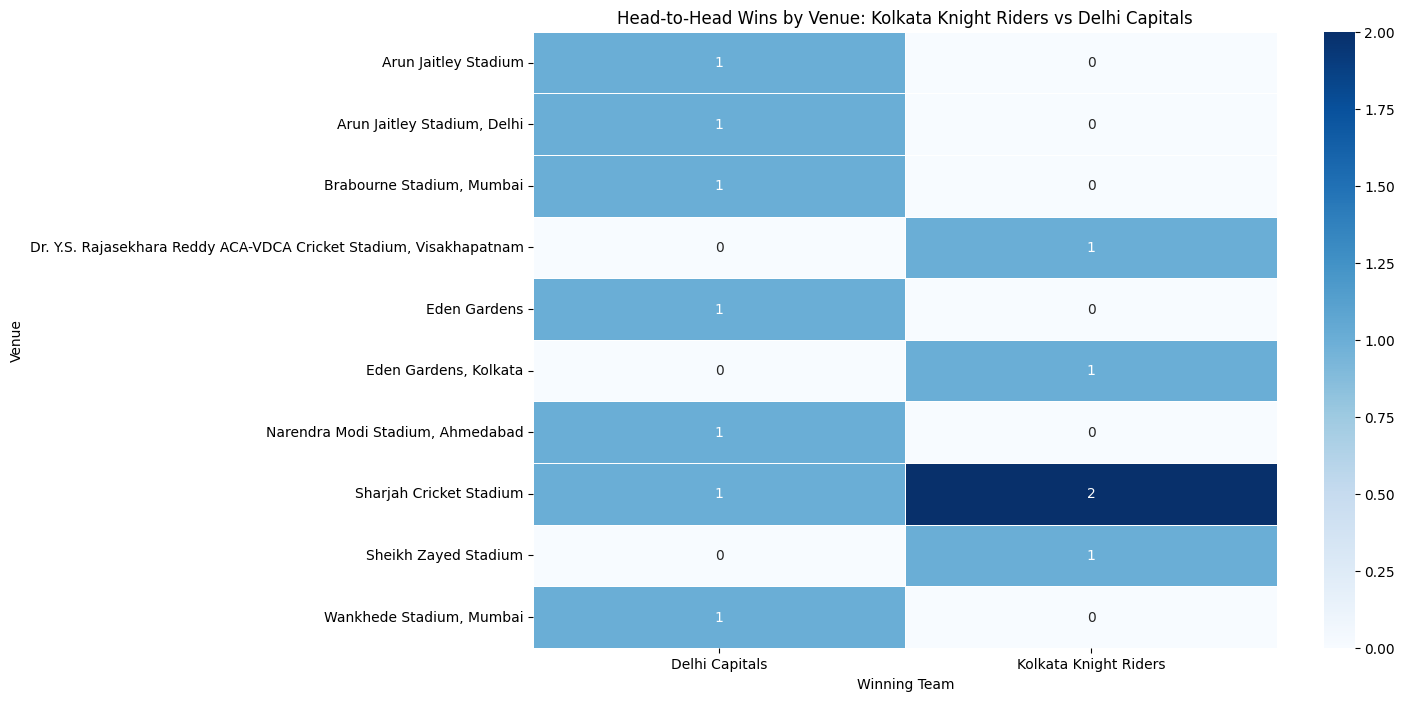

In [39]:
team1 = 'Kolkata Knight Riders'
team2 = 'Delhi Capitals'
head_to_head_venue = matches_df[((matches_df['team1'] == team1) & (matches_df['team2'] == team2)) |
                               ((matches_df['team1'] == team2) & (matches_df['team2'] == team1))]
wins_by_venue = head_to_head_venue.groupby(['venue', 'winner']).size().unstack().fillna(0)
plt.figure(figsize=(12, 8))
sns.heatmap(wins_by_venue, cmap="Blues", annot=True, fmt=".0f", linewidths=0.5)
plt.xlabel("Winning Team")
plt.ylabel("Venue")
plt.title(f"Head-to-Head Wins by Venue: {team1} vs {team2}")
plt.show()